# Exercices Week 4 - Anthony Bernardo

## Exercice 1

In [1]:
from matplotlib.pyplot import imshow
from PIL import Image

def show_image(path):
    img = Image.open(path, 'r')
    imshow(np.asarray(img))

Text(0.5, 0, 'living area distribution')

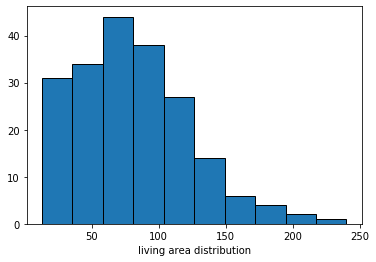

In [2]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
%matplotlib inline

train_set = pandas.read_excel('lausanne-appart.xlsx', names=["living-area", "rooms", "rent"])

living_area = train_set["living-area"]
plt.hist(living_area, edgecolor="black")
plt.xlabel("living area distribution")

Text(0.5, 0, 'rent distribution')

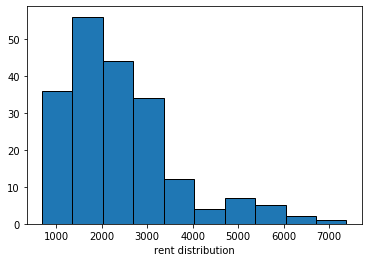

In [3]:
rent = train_set["rent"]
plt.hist(rent, edgecolor="black")
plt.xlabel("rent distribution")

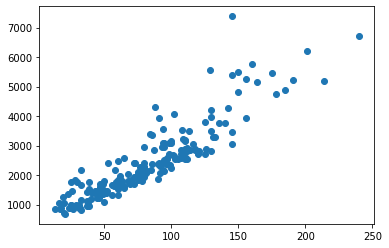

In [4]:
plt.scatter(living_area, rent)

## Exercice 2

## a)

### 1) Easy Way

[ 26.33242457 240.07710727]
For living area 50, renting wil be : 1556.6983358657458


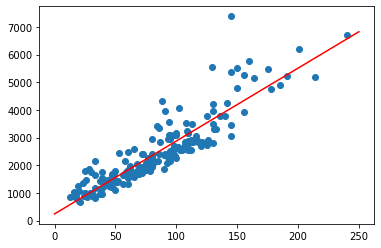

In [5]:
import math
import random

x = living_area.to_numpy()
y = rent.to_numpy()

coef_degree_1 = np.polyfit(x, y, deg=1)
h1 = np.poly1d(coef_degree_1)

print(coef_degree_1)

plt.scatter(x, y)
new_x = np.linspace(0, 250, 50) # de 0 à 7000, 50x (equidistant)
plt.plot(new_x, h1(new_x), color="red")

living_area_1 = 50
rent_1 = coef_degree_1[1] + coef_degree_1[0] * living_area_1 

print(f"For living area {living_area_1}, renting wil be : {rent_1}")

### 2) By hand way

array([[240.07710727],
       [ 26.33242457]])

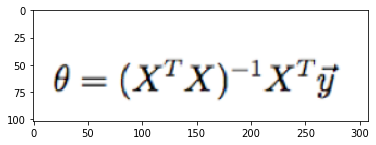

In [6]:
x = x * 1.0
y = y * 1.0

# add ones (because x0 eq 1)
X = np.ones((201, 2))
X[:, 1] = x

# convert to matrix
Y = y[:,np.newaxis]

# compute teta
show_image('theta.png')
p1 = np.linalg.inv((X.T.dot(X)))
p2 = (X.T).dot(Y)

theta = p1.dot(p2)
# This is exactly the same as h1 = np.polyfit(x, y, deg=1) ?
    
theta

**If I understand well, the polyfit (as computed here) is not great because of the inversed matrix,**

**Then we must use the way with gradient ?**

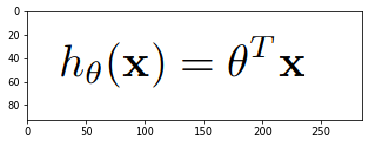

In [7]:
show_image('h_theta.png')
def h2(x1, theta):
    X = np.matrix([[1], [x1]])
    theta_T = theta.T
    result = theta_T.dot(X)
    return np.asscalar(result) # convert matrix 1,1 to scalar

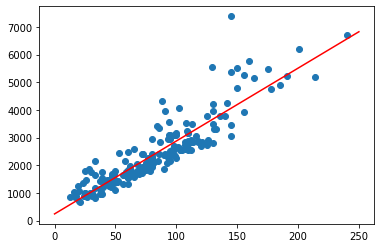

In [8]:
plt.scatter(x, y)
new_x = np.linspace(0, 250, 50) 
plt.plot(new_x, h2(new_x, theta), color="red")

## b)

3125005.346399045

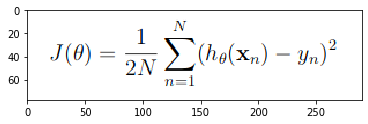

In [9]:
show_image('cost_mse.png')

def cost_function(N, y_predicted, y_ground_truth):
    nb = 2 * N
    return (np.sum(np.square(y_predicted - y_ground_truth))) / nb
    
cost_function(X.shape[0], h2(X, theta), Y)

**Not sure of that, I don't know what kind of number this should be**

## Exercice 3

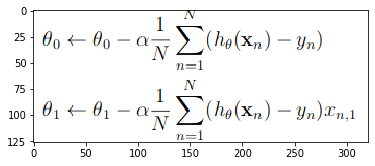

In [10]:
show_image('full_batch.png')

def descent_update_x0(N, y_chapeau, y, pas):
    normalizer = (1/N)
    return pas * normalizer * np.sum((y_chapeau - y) * 1) 

def descent_update_x1(N, y_chapeau, y, x1, pas):
    normalizer = (1 / N)
    return pas * normalizer * np.sum((y_chapeau - y) * x1) 

In [35]:
import time
import random

# random theta
theta = np.matrix([[100], [100]])

thetas = []
errors = []

pas = 0.0001
pas2 = 0.001

print(theta[0])
print(theta[1])

old_diff1 = 0 
old_diff2 = 0 

for i in range(0, 5000000):
    old_theta = theta[:]

    A = descent_update_x0(len(x), h2(x, theta), y, pas2)
    B = descent_update_x1(len(x), h2(x, theta), y, x, pas)

    
    theta[0] = theta[0] - A
    theta[1] = theta[1] - B
    
    tht1 = np.asscalar(theta[0]) - A
    tht2 = np.asscalar(theta[1]) - B
    print(tht1)
    print(tht2)
    
    theta = np.matrix([[tht1], [tht2]])
    
    print("diff")
    diff1 = np.absolute(np.asscalar(old_theta[0]) - np.asscalar(theta[0]))
    diff2 = np.absolute(np.asscalar(old_theta[1]) - np.asscalar(theta[1]))
    
    if old_diff1 == diff1 and old_diff2 == diff2:
        print("stop")
        break;
    
    old_diff1 = diff1.copy()
    old_diff2 = diff2.copy()
    print("-------------------")
    
#     plt.scatter(x, y)
#     new_x = np.linspace(0, 250, 50) 
#     plt.plot(new_x, h2(new_x, theta), color="red")
#     plt.draw()
#     plt.pause(0.0001)
#     plt.clf()
    
    thetas.append(theta)
    
    error = cost_function(X.shape[0], h2(x, theta), y)
    errors.append(error)
    

[[100]]
[[100]]
88.15834328358208
-21.58667014925374
diff
-------------------
96.24414643289522
61.18070452177175
diff
-------------------
90.87252104052857
5.119648087284052
diff
-------------------
94.61584289961604
43.08993191723458
diff
-------------------
92.18537958375526
17.370863497257147
diff
-------------------
93.93650272370482
34.789898255958974
diff
-------------------
92.85530703730709
22.990612622854
diff
-------------------
93.69245424793297
30.981494265023272
diff
-------------------
93.23022388770133
25.568090707945828
diff
-------------------
93.64804395291713
29.233684491437927
diff
-------------------
93.46974324227739
26.749887855121052
diff
-------------------
93.69516276391789
28.431199732272347
diff
-------------------
93.64708974356003
27.291398736667304
diff
-------------------
93.78421428266847
28.062395702742464
diff
-------------------
93.7958561997304
27.53917050454487
diff
-------------------
93.8924455639013
27.892548917477775
diff
-------------------
9

-------------------
118.23941273380703
27.513464220529258
diff
-------------------
118.29128963427715
27.512961349258312
diff
-------------------
118.34314444623999
27.512458692103394
diff
-------------------
118.39497717910055
27.511956248973334
diff
-------------------
118.44678784225982
27.511454019777005
diff
-------------------
118.4985764451148
27.510952004423302
diff
-------------------
118.55034299705846
27.510450202821197
diff
-------------------
118.60208750747984
27.50994861487966
diff
-------------------
118.65380998576387
27.509447240507733
diff
-------------------
118.70551044129158
27.50894607961446
diff
-------------------
118.75718888343997
27.508445132108967
diff
-------------------
118.80884532158203
27.507944397900374
diff
-------------------
118.86047976508681
27.50744387689788
diff
-------------------
118.91209222331932
27.506943569010687
diff
-------------------
118.9636827056406
27.506443474148085
diff
-------------------
119.01525122140771
27.505943592219325
di

137.45420735487008
27.32720466946794
diff
-------------------
137.49790284652468
27.326781105083334
diff
-------------------
137.5415797332091
27.326357721046918
diff
-------------------
137.58523802284512
27.3259345172819
diff
-------------------
137.6288777233511
27.325511493711517
diff
-------------------
137.67249884264206
27.325088650259055
diff
-------------------
137.71610138862965
27.32466598684782
diff
-------------------
137.75968536922213
27.324243503401142
diff
-------------------
137.8032507923244
27.323821199842413
diff
-------------------
137.846797665838
27.323399076095022
diff
-------------------
137.8903259976611
27.322977132082414
diff
-------------------
137.9338357956885
27.322555367728064
diff
-------------------
137.97732706781167
27.32213378295547
diff
-------------------
138.0207998219187
27.321712377688172
diff
-------------------
138.0642540658943
27.321291151849735
diff
-------------------
138.10768980761983
27.320870105363767
diff
-------------------
138.15

156.2846198221499
27.14467114560658
diff
-------------------
156.32029756989422
27.14432530161455
diff
-------------------
156.35596012651908
27.143979604878382
diff
-------------------
156.39160749849273
27.143634055335376
diff
-------------------
156.42723969228055
27.14328865292285
diff
-------------------
156.46285671434518
27.142943397578165
diff
-------------------
156.49845857114659
27.142598289238713
diff
-------------------
156.53404526914196
27.142253327841864
diff
-------------------
156.5696168147857
27.1419085133251
diff
-------------------
156.60517321452946
27.141563845625846
diff
-------------------
156.6407144748222
27.141219324681607
diff
-------------------
156.67624060211008
27.140874950429883
diff
-------------------
156.71175160283653
27.140530722808222
diff
-------------------
156.7472474834423
27.140186641754198
diff
-------------------
156.78272825036524
27.139842707205396
diff
-------------------
156.81819391004066
27.139498919099424
diff
-------------------
1

diff
-------------------
171.1626817204183
27.000449925214447
diff
-------------------
171.19202458355036
27.00016548873611
diff
-------------------
171.22135495287418
26.99988117336713
diff
-------------------
171.2506728337095
26.99959697905591
diff
-------------------
171.2799782313737
26.999312905750926
diff
-------------------
171.309271151182
26.999028953400646
diff
-------------------
171.33855159844725
26.998745121953576
diff
-------------------
171.36781957848015
26.998461411358228
diff
-------------------
171.39707509658908
26.998177821563154
diff
-------------------
171.42631815808014
26.99789435251691
diff
-------------------
171.45554876825722
26.997611004168093
diff
-------------------
171.48476693242193
26.99732777646529
diff
-------------------
171.51397265587363
26.997044669357166
diff
-------------------
171.54316594390937
26.99676168279234
diff
-------------------
171.572346801824
26.99647881671951
diff
-------------------
171.60151523491012
26.996196071087354
diff
-

183.01149273063456
26.885592896404255
diff
-------------------
183.03579052465372
26.885357364550025
diff
-------------------
183.06007797298926
26.88512193298218
diff
-------------------
183.08435508004627
26.88488660165803
diff
-------------------
183.10862185022788
26.884651370534876
diff
-------------------
183.13287828793537
26.884416239570086
diff
-------------------
183.1571243975682
26.884181208720968
diff
-------------------
183.18136018352394
26.883946277944936
diff
-------------------
183.2055856501983
26.883711447199353
diff
-------------------
183.22980080198502
26.883476716441642
diff
-------------------
183.25400564327614
26.883242085629227
diff
-------------------
183.27820017846167
26.88300755471954
diff
-------------------
183.30238441192986
26.88277312367007
diff
-------------------
183.32655834806698
26.882538792438268
diff
-------------------
183.3507219912576
26.88230456098165
diff
-------------------
183.3748753458842
26.88207042925773
diff
-------------------
18

191.76493285918272
26.80074099656671
diff
-------------------
191.7855035526189
26.80054159354419
diff
-------------------
191.8060654873223
26.80034227542488
diff
-------------------
191.8266186670222
26.80014304217263
diff
-------------------
191.84716309544635
26.79994389375129
diff
-------------------
191.86769877632096
26.79974483012475
diff
-------------------
191.88822571337064
26.79954585125691
diff
-------------------
191.9087439103184
26.799346957111673
diff
-------------------
191.92925337088562
26.799148147652964
diff
-------------------
191.94975409879217
26.79894942284473
diff
-------------------
191.9702460977563
26.798750782650934
diff
-------------------
191.99072937149467
26.798552227035522
diff
-------------------
192.01120392372238
26.798353755962523
diff
-------------------
192.0316697581529
26.7981553693959
diff
-------------------
192.05212687849817
26.7979570672997
diff
-------------------
192.07257528846853
26.797758849637937
diff
-------------------
192.093014

26.71350841767609
diff
-------------------
200.7807061755838
26.713346157147363
diff
-------------------
200.79743807038884
26.71318396570706
diff
-------------------
200.81416284097142
26.71302184332575
diff
-------------------
200.83088049036493
26.71285978997404
diff
-------------------
200.84759102160146
26.712697805622525
diff
-------------------
200.86429443771183
26.71253589024184
diff
-------------------
200.88099074172558
26.712374043802605
diff
-------------------
200.89767993667098
26.712212266275472
diff
-------------------
200.91436202557495
26.71205055763111
diff
-------------------
200.93103701146313
26.711888917840163
diff
-------------------
200.9477048973599
26.71172734687334
diff
-------------------
200.96436568628835
26.711565844701326
diff
-------------------
200.98101938127027
26.71140441129483
diff
-------------------
200.99766598532622
26.71124304662456
diff
-------------------
201.01430550147538
26.71108175066128
diff
-------------------
201.03093793273567
26.7

207.68922016197016
26.646378139066414
diff
-------------------
207.70301050166907
26.646244461734334
diff
-------------------
207.7167949696213
26.64611084132033
diff
-------------------
207.73057356832695
26.645977277800142
diff
-------------------
207.74434630028506
26.645843771149565
diff
-------------------
207.75811316799363
26.645710321344374
diff
-------------------
207.77187417394956
26.645576928360377
diff
-------------------
207.78562932064872
26.645443592173358
diff
-------------------
207.79937861058593
26.645310312759165
diff
-------------------
207.8131220462549
26.64517709009359
diff
-------------------
207.82685963014828
26.645043924152503
diff
-------------------
207.84059136475773
26.644910814911725
diff
-------------------
207.85431725257374
26.644777762347132
diff
-------------------
207.86803729608582
26.644644766434574
diff
-------------------
207.8817514977824
26.644511827149955
diff
-------------------
207.89545986015085
26.644378944469132
diff
-----------------

212.85508119858903
26.59630261255149
diff
-------------------
212.86667198206797
26.596190256725173
diff
-------------------
212.8782578303425
26.596077948738497
diff
-------------------
212.88983874551403
26.59596568857109
diff
-------------------
212.901414729683
26.595853476202606
diff
-------------------
212.91298578494897
26.595741311612684
diff
-------------------
212.92455191341062
26.595629194780976
diff
-------------------
212.93611311716572
26.59551712568716
diff
-------------------
212.9476693983111
26.595405104310892
diff
-------------------
212.95922075894273
26.595293130631873
diff
-------------------
212.97076720115578
26.595181204629775
diff
-------------------
212.9823087270444
26.595069326284317
diff
-------------------
212.9938453387019
26.594957495575194
diff
-------------------
213.0053770382207
26.594845712482133
diff
-------------------
213.0169038276923
26.59473397698485
diff
-------------------
213.02842570920737
26.594622289063082
diff
-------------------
213.

217.32331219491422
26.55298959693895
diff
-------------------
217.33300046394092
26.552895683229494
diff
-------------------
217.34268460782906
26.55280180950725
diff
-------------------
217.3523646283351
26.552707975755233
diff
-------------------
217.36204052721476
26.552614181956386
diff
-------------------
217.37171230622292
26.55252042809373
diff
-------------------
217.38137996711376
26.55242671415023
diff
-------------------
217.3910435116408
26.55233304010892
diff
-------------------
217.40070294155666
26.552239405952776
diff
-------------------
217.4103582586133
26.55214581166485
diff
-------------------
217.4200094645619
26.55205225722814
diff
-------------------
217.429656561153
26.551958742625693
diff
-------------------
217.4392995501362
26.551865267840547
diff
-------------------
217.44893843326057
26.551771832855735
diff
-------------------
217.45857321227427
26.55167843765433
diff
-------------------
217.46820388892476
26.551585082219376
diff
-------------------
217.477

26.514290541675408
diff
-------------------
221.32354903925417
26.5142131055187
diff
-------------------
221.3315340596317
26.514135702333284
diff
-------------------
221.33951568009175
26.51405833210513
diff
-------------------
221.34749390208194
26.51398099482023
diff
-------------------
221.35546872704933
26.51390369046451
diff
-------------------
221.3634401564403
26.513826419024
diff
-------------------
221.37140819170062
26.513749180484638
diff
-------------------
221.37937283427553
26.513671974832462
diff
-------------------
221.38733408560958
26.513594802053426
diff
-------------------
221.39529194714666
26.513517662133566
diff
-------------------
221.40324642033013
26.513440555058864
diff
-------------------
221.41119750660275
26.513363480815364
diff
-------------------
221.41914520740656
26.513286439389056
diff
-------------------
221.42708952418312
26.513209430765997
diff
-------------------
221.43503045837323
26.51313245493219
diff
-------------------
221.4429680114172
26.5

-------------------
223.95491136433057
26.488705866174534
diff
-------------------
223.96177598496675
26.488639323638786
diff
-------------------
223.968637682737
26.488572809435986
diff
-------------------
223.97549645888594
26.488506323554063
diff
-------------------
223.98235231465745
26.488439865980965
diff
-------------------
223.98920525129503
26.488373436704627
diff
-------------------
223.99605527004164
26.48830703571302
diff
-------------------
224.00290237213963
26.488240662994073
diff
-------------------
224.00974655883093
26.488174318535783
diff
-------------------
224.01658783135682
26.48810800232608
diff
-------------------
224.02342619095813
26.48804171435296
diff
-------------------
224.0302616388752
26.487975454604396
diff
-------------------
224.03709417634772
26.487909223068364
diff
-------------------
224.04392380461493
26.487843019732864
diff
-------------------
224.05075052491557
26.487776844585866
diff
-------------------
224.0575743384878
26.487710697615398
diff

-------------------
226.28183782025812
26.46614969081169
diff
-------------------
226.28771166597343
26.466092752401075
diff
-------------------
226.29358301068189
26.4660358382341
diff
-------------------
226.29945185544838
26.46597894830043
diff
-------------------
226.30531820133737
26.46592208258975
diff
-------------------
226.31118204941285
26.465865241091755
diff
-------------------
226.3170434007383
26.465808423796112
diff
-------------------
226.32290225637686
26.46575163069255
diff
-------------------
226.32875861739112
26.465694861770743
diff
-------------------
226.3346124848433
26.465638117020404
diff
-------------------
226.3404638597951
26.46558139643124
diff
-------------------
226.34631274330783
26.465524699992955
diff
-------------------
226.35215913644228
26.46546802769528
diff
-------------------
226.3580030402588
26.46541137952793
diff
-------------------
226.36384445581731
26.465354755480632
diff
-------------------
226.3696833841773
26.465298155543103
diff
------

228.25782648966018
26.446995348039707
diff
-------------------
228.26285898518475
26.446946565298298
diff
-------------------
228.26788933793844
26.446897803327957
diff
-------------------
228.27291754883353
26.44684906211981
diff
-------------------
228.27794361878207
26.446800341665046
diff
-------------------
228.2829675486956
26.446751641954812
diff
-------------------
228.28798933948534
26.446702962980275
diff
-------------------
228.29300899206206
26.44665430473262
diff
-------------------
228.29802650733623
26.446605667203002
diff
-------------------
228.30304188621787
26.446557050382616
diff
-------------------
228.30805512961663
26.446508454262634
diff
-------------------
228.3130662384418
26.44645987883424
diff
-------------------
228.3180752136022
26.446411324088643
diff
-------------------
228.32308205600637
26.446362790017012
diff
-------------------
228.32808676656234
26.446314276610565
diff
-------------------
228.33308934617784
26.446265783860483
diff
------------------

26.429297197801915
diff
-------------------
230.0878474180062
26.429255950701943
diff
-------------------
230.09210071449948
26.429214721164442
diff
-------------------
230.09635219999458
26.429173509181943
diff
-------------------
230.1006018752627
26.429132314746965
diff
-------------------
230.1048497410745
26.429091137852048
diff
-------------------
230.10909579820046
26.4290499784897
diff
-------------------
230.11334004741073
26.429008836652493
diff
-------------------
230.11758248947504
26.42896771233292
diff
-------------------
230.12182312516288
26.428926605523564
diff
-------------------
230.1260619552434
26.428885516216944
diff
-------------------
230.13029898048538
26.428844444405613
diff
-------------------
230.13453420165732
26.428803390082123
diff
-------------------
230.13876761952733
26.42876235323903
diff
-------------------
230.14299923486325
26.428721333868893
diff
-------------------
230.1472290484326
26.428680331964266
diff
-------------------
230.1514570610025
26

diff
-------------------
231.73459613680174
26.413293111487548
diff
-------------------
231.738148269179
26.413258678718684
diff
-------------------
231.74169888910464
26.413224260610853
diff
-------------------
231.74524799722266
26.41318985715779
diff
-------------------
231.74879559417676
26.41315546835328
diff
-------------------
231.75234168061033
26.413121094191062
diff
-------------------
231.75588625716662
26.41308673466493
diff
-------------------
231.75942932448842
26.413052389768616
diff
-------------------
231.7629708832184
26.413018059495933
diff
-------------------
231.7665109339989
26.412983743840613
diff
-------------------
231.77004947747199
26.412949442796467
diff
-------------------
231.7735865142794
26.412915156357244
diff
-------------------
231.77712204506273
26.412880884516746
diff
-------------------
231.78065607046315
26.41284662726875
diff
-------------------
231.7841885911217
26.41281238460705
diff
-------------------
231.78771960767907
26.412778156525412
dif

233.36043686926874
26.397532944860806
diff
-------------------
233.3632967398777
26.397505222565243
diff
-------------------
233.36615539279111
26.397477512073465
diff
-------------------
233.36901282852742
26.39744981338046
diff
-------------------
233.37186904760486
26.39742212648119
diff
-------------------
233.37472405054152
26.39739445137065
diff
-------------------
233.37757783785517
26.397366788043797
diff
-------------------
233.38043041006344
26.397339136495646
diff
-------------------
233.38328176768366
26.397311496721144
diff
-------------------
233.38613191123298
26.397283868715313
diff
-------------------
233.3889808412284
26.397256252473113
diff
-------------------
233.39182855818663
26.397228647989564
diff
-------------------
233.3946750626241
26.39720105525962
diff
-------------------
233.39752035505714
26.397173474278333
diff
-------------------
233.4003644360018
26.397145905040638
diff
-------------------
233.4032073059739
26.397118347541586
diff
-------------------
2

234.43655077514367
26.38710158210351
diff
-------------------
234.43895245049376
26.3870783013461
diff
-------------------
234.44135310324182
26.387055030501315
diff
-------------------
234.4437527338233
26.387031769564956
diff
-------------------
234.44615134267335
26.38700851853281
diff
-------------------
234.44854893022708
26.386985277400633
diff
-------------------
234.45094549691927
26.386962046164243
diff
-------------------
234.45334104318468
26.386938824819396
diff
-------------------
234.45573556945774
26.3869156133619
diff
-------------------
234.45812907617275
26.386892411787542
diff
-------------------
234.46052156376382
26.38686922009211
diff
-------------------
234.46291303266494
26.3868460382714
diff
-------------------
234.46530348330978
26.386822866321204
diff
-------------------
234.46769291613194
26.386799704237326
diff
-------------------
234.47008133156478
26.38677655201556
diff
-------------------
234.47246873004147
26.386753409651703
diff
-------------------
234

235.45976050503398
26.377183048562593
diff
-------------------
235.461726511033
26.377163990987334
diff
-------------------
235.46369167993228
26.377144941526524
diff
-------------------
235.46565601208832
26.377125900176743
diff
-------------------
235.46761950785734
26.377106866934504
diff
-------------------
235.46958216759546
26.37708784179638
diff
-------------------
235.4715439916587
26.377068824758915
diff
-------------------
235.47350498040285
26.377049815818644
diff
-------------------
235.47546513418357
26.377030814972144
diff
-------------------
235.4774244533564
26.377011822215948
diff
-------------------
235.4793829382767
26.37699283754663
diff
-------------------
235.48134058929966
26.376973860960724
diff
-------------------
235.4832974067804
26.376954892454812
diff
-------------------
235.48525339107377
26.37693593202544
diff
-------------------
235.48720854253455
26.37691697966916
diff
-------------------
235.48916286151731
26.37689803538256
diff
-------------------
235

236.28768705626211
26.36915750206134
diff
-------------------
236.28930054193918
26.36914186165904
diff
-------------------
236.29091334061516
26.369126227916233
diff
-------------------
236.29252545258245
26.369110600830055
diff
-------------------
236.29413687813351
26.369094980397698
diff
-------------------
236.29574761756064
26.36907936661631
diff
-------------------
236.29735767115594
26.369063759483076
diff
-------------------
236.29896703921142
26.36904815899514
diff
-------------------
236.30057572201898
26.36903256514971
diff
-------------------
236.30218371987038
26.369016977943915
diff
-------------------
236.3037910330573
26.36900139737496
diff
-------------------
236.30539766187124
26.368985823440006
diff
-------------------
236.30700360660356
26.368970256136222
diff
-------------------
236.3086088675456
26.368954695460808
diff
-------------------
236.31021344498842
26.368939141410912
diff
-------------------
236.31181733922315
26.368923593983745
diff
-------------------


236.9645098296576
26.36259668741789
diff
-------------------
236.96583513302963
26.362583840524856
diff
-------------------
236.96715987210482
26.36257099910187
diff
-------------------
236.96848404712338
26.362558163146588
diff
-------------------
236.9698076583255
26.362545332656687
diff
-------------------
236.97113070595125
26.36253250762985
diff
-------------------
236.9724531902406
26.362519688063728
diff
-------------------
236.97377511143335
26.362506873956022
diff
-------------------
236.97509646976934
26.36249406530439
diff
-------------------
236.9764172654882
26.36248126210652
diff
-------------------
236.97773749882944
26.362468464360077
diff
-------------------
236.97905717003258
26.36245567206275
diff
-------------------
236.98037627933692
26.362442885212218
diff
-------------------
236.98169482698174
26.36243010380617
diff
-------------------
236.98301281320616
26.36241732784226
diff
-------------------
236.98433023824927
26.3624045573182
diff
-------------------
236.98

diff
-------------------
237.48977669318893
26.357504987396204
diff
-------------------
237.4908783447847
26.3574943084826
diff
-------------------
237.4919795273116
26.357483634115944
diff
-------------------
237.49308024096936
26.35747296429428
diff
-------------------
237.49418048595763
26.357462299015708
diff
-------------------
237.49528026247592
26.35745163827825
diff
-------------------
237.4963795707237
26.357440982080014
diff
-------------------
237.49747841090036
26.357430330419035
diff
-------------------
237.4985767832052
26.3574196832934
diff
-------------------
237.49967468783748
26.35740904070117
diff
-------------------
237.5007721249963
26.35739840264042
diff
-------------------
237.50186909488067
26.357387769109216
diff
-------------------
237.5029655976896
26.357377140105626
diff
-------------------
237.50406163362194
26.35736651562774
diff
-------------------
237.50515720287646
26.3573558956736
diff
-------------------
237.50625230565194
26.35734528024131
diff
-----

-------------------
237.95460950951227
26.352999107765726
diff
-------------------
237.95551324136048
26.35299034739687
diff
-------------------
237.95641658841143
26.352981590758063
diff
-------------------
237.957319550829
26.35297283784773
diff
-------------------
237.95822212877695
26.352964088664258
diff
-------------------
237.959124322419
26.352955343206084
diff
-------------------
237.9600261319188
26.352946601471608
diff
-------------------
237.96092755743987
26.352937863459253
diff
-------------------
237.96182859914572
26.35292912916742
diff
-------------------
237.96272925719975
26.35292039859455
diff
-------------------
237.96362953176535
26.352911671739022
diff
-------------------
237.96452942300576
26.352902948599294
diff
-------------------
237.96542893108423
26.352894229173756
diff
-------------------
237.96632805616392
26.35288551346084
diff
-------------------
237.96722679840784
26.35287680145896
diff
-------------------
237.96812515797907
26.352868093166535
diff
---

-------------------
238.2893446555639
26.34975433626243
diff
-------------------
238.29010586155485
26.34974695747494
diff
-------------------
238.29086674343424
26.349739581829247
diff
-------------------
238.29162730134007
26.349732209324003
diff
-------------------
238.29238753541026
26.349724839957872
diff
-------------------
238.2931474457827
26.349717473729534
diff
-------------------
238.29390703259523
26.349710110637623
diff
-------------------
238.2946662959856
26.349702750680834
diff
-------------------
238.29542523609152
26.349695393857807
diff
-------------------
238.29618385305062
26.34968804016723
diff
-------------------
238.29694214700052
26.34968068960775
diff
-------------------
238.29770011807878
26.34967334217805
diff
-------------------
238.29845776642284
26.349665997876784
diff
-------------------
238.2992150921701
26.34965865670263
diff
-------------------
238.29997209545795
26.349651318654246
diff
-------------------
238.3007287764237
26.349643983730317
diff
---

26.347578716352736
diff
-------------------
238.51445027699182
26.347572263915815
diff
-------------------
238.51511563594661
26.347565814226257
diff
-------------------
238.51578071160023
26.34755936728289
diff
-------------------
238.5164455040733
26.347552923084557
diff
-------------------
238.51711001348642
26.347546481630076
diff
-------------------
238.51777423996012
26.347540042918276
diff
-------------------
238.51843818361485
26.347533606947998
diff
-------------------
238.519101844571
26.34752717371807
diff
-------------------
238.51976522294902
26.347520743227335
diff
-------------------
238.52042831886914
26.347514315474612
diff
-------------------
238.5210911324517
26.347507890458743
diff
-------------------
238.52175366381684
26.34750146817857
diff
-------------------
238.5224159130848
26.347495048632908
diff
-------------------
238.52307788037567
26.347488631820617
diff
-------------------
238.5237395658095
26.347482217740513
diff
-------------------
238.52440096950633
2

diff
-------------------
238.78697771591195
26.344930505862912
diff
-------------------
238.78752703623942
26.344925180999454
diff
-------------------
238.78807612267352
26.344919858403266
diff
-------------------
238.78862497531375
26.34491453807336
diff
-------------------
238.78917359425967
26.344909220008788
diff
-------------------
238.7897219796108
26.34490390420858
diff
-------------------
238.7902701314666
26.34489859067176
diff
-------------------
238.79081804992651
26.34489327939739
diff
-------------------
238.7913657350899
26.344887970384477
diff
-------------------
238.7919131870561
26.344882663632077
diff
-------------------
238.7924604059244
26.344877359139225
diff
-------------------
238.79300739179402
26.344872056904954
diff
-------------------
238.79355414476422
26.34486675692831
diff
-------------------
238.79410066493412
26.344861459208325
diff
-------------------
238.79464695240287
26.34485616374404
diff
-------------------
238.79519300726955
26.344850870534493
dif

26.342506143596886
diff
-------------------
239.03752113353303
26.342501850995248
diff
-------------------
239.03796377574267
26.342497560221354
diff
-------------------
239.038406229481
26.342493271274407
diff
-------------------
239.03884849482833
26.34248898415364
diff
-------------------
239.03929057186483
26.34248469885827
diff
-------------------
239.0397324606707
26.342480415387534
diff
-------------------
239.04017416132606
26.342476133740632
diff
-------------------
239.04061567391105
26.342471853916805
diff
-------------------
239.04105699850575
26.342467575915272
diff
-------------------
239.0414981351902
26.34246329973525
diff
-------------------
239.0419390840444
26.34245902537598
diff
-------------------
239.04237984514836
26.342454752836666
diff
-------------------
239.04282041858195
26.342450482116547
diff
-------------------
239.04326080442516
26.34244621321485
diff
-------------------
239.04370100275779
26.34244194613079
diff
-------------------
239.04414101365975
26.

239.24332411799773
26.340506889703732
diff
-------------------
239.24367913198208
26.34050344835832
diff
-------------------
239.24403399480613
26.340500008478188
diff
-------------------
239.24438870653418
26.340496570062705
diff
-------------------
239.24474326723063
26.340493133111266
diff
-------------------
239.24509767695977
26.340489697623227
diff
-------------------
239.2454519357859
26.340486263597974
diff
-------------------
239.24580604377323
26.34048283103489
diff
-------------------
239.24616000098595
26.340479399933336
diff
-------------------
239.24651380748836
26.340475970292715
diff
-------------------
239.24686746334456
26.34047254211238
diff
-------------------
239.24722096861868
26.340469115391727
diff
-------------------
239.2475743233749
26.340465690130117
diff
-------------------
239.24792752767726
26.340462266326952
diff
-------------------
239.24828058158985
26.34045884398158
diff
-------------------
239.24863348517667
26.340455423093417
diff
------------------

239.3931193443789
26.339054842353384
diff
-------------------
239.39341057751054
26.339052019270795
diff
-------------------
239.39370168663893
26.339049197390217
diff
-------------------
239.39399267181685
26.33904637671118
diff
-------------------
239.39428353309708
26.339043557233133
diff
-------------------
239.3945742705324
26.33904073895559
diff
-------------------
239.39486488417546
26.339037921878038
diff
-------------------
239.39515537407905
26.339035105999947
diff
-------------------
239.3954457402958
26.33903229132084
diff
-------------------
239.3957359828784
26.339029477840164
diff
-------------------
239.39602610187953
26.339026665557455
diff
-------------------
239.39631609735173
26.33902385447216
diff
-------------------
239.3966059693477
26.339021044583795
diff
-------------------
239.39689571791993
26.33901823589185
diff
-------------------
239.39718534312098
26.339015428395797
diff
-------------------
239.39747484500342
26.339012622095154
diff
-------------------
23

239.48758707629534
26.338139114775572
diff
-------------------
239.48783808629943
26.33813668159783
diff
-------------------
239.48808898942676
26.338134249456104
diff
-------------------
239.4883397857228
26.338131818349943
diff
-------------------
239.48859047523305
26.338129388278915
diff
-------------------
239.48884105800298
26.338126959242587
diff
-------------------
239.48909153407803
26.33812453124051
diff
-------------------
239.48934190350363
26.338122104272237
diff
-------------------
239.4895921663252
26.338119678337343
diff
-------------------
239.48984232258815
26.338117253435385
diff
-------------------
239.49009237233778
26.338114829565903
diff
-------------------
239.49034231561953
26.33811240672849
diff
-------------------
239.49059215247868
26.338109984922674
diff
-------------------
239.49084188296055
26.338107564148046
diff
-------------------
239.49109150711044
26.33810514440414
diff
-------------------
239.49134102497365
26.338102725690533
diff
------------------

26.337306008634073
diff
-------------------
239.5737458818111
26.337303930182046
diff
-------------------
239.57396020652013
26.337301852615006
diff
-------------------
239.57417443997244
26.337299775932557
diff
-------------------
239.57438858220698
26.337297700134343
diff
-------------------
239.57460263326251
26.337295625219966
diff
-------------------
239.57481659317793
26.33729355118907
diff
-------------------
239.575030461992
26.33729147804126
diff
-------------------
239.5752442397435
26.337289405776175
diff
-------------------
239.57545792647127
26.337287334393437
diff
-------------------
239.57567152221398
26.337285263892653
diff
-------------------
239.5758850270104
26.337283194273475
diff
-------------------
239.5760984408993
26.33728112553551
diff
-------------------
239.57631176391934
26.337279057678387
diff
-------------------
239.5765249961092
26.33727699070173
diff
-------------------
239.5767381375076
26.33727492460516
diff
-------------------
239.57695118815317
26.33

26.33635133767151
diff
-------------------
239.67218913381302
26.336349665705924
diff
-------------------
239.6723615426699
26.33634799445224
diff
-------------------
239.67253387811738
26.336346323910156
diff
-------------------
239.67270614018665
26.33634465407936
diff
-------------------
239.67287832890898
26.336342984959572
diff
-------------------
239.67305044431558
26.336341316550453
diff
-------------------
239.6732224864377
26.33633964885174
diff
-------------------
239.67339445530652
26.336337981863096
diff
-------------------
239.67356635095322
26.336336315584248
diff
-------------------
239.67373817340902
26.33633465001487
diff
-------------------
239.67390992270506
26.33633298515467
diff
-------------------
239.6740815988725
26.33633132100335
diff
-------------------
239.6742532019425
26.336329657560604
diff
-------------------
239.67442473194612
26.33632799482612
diff
-------------------
239.67459618891448
26.336326332799622
diff
-------------------
239.67476757287872
26.3

239.7463472674241
26.33563081021221
diff
-------------------
239.74648810071542
26.335629445037817
diff
-------------------
239.74662887404176
26.335628080444693
diff
-------------------
239.74676958742864
26.3356267164326
diff
-------------------
239.7469102409016
26.335625353001276
diff
-------------------
239.74705083448615
26.335623990150502
diff
-------------------
239.74719136820775
26.335622627879992
diff
-------------------
239.74733184209194
26.335621266189534
diff
-------------------
239.74747225616417
26.335619905078858
diff
-------------------
239.74761261044992
26.335618544547728
diff
-------------------
239.74775290497465
26.33561718459589
diff
-------------------
239.74789313976382
26.33561582522311
diff
-------------------
239.74803331484284
26.335614466429128
diff
-------------------
239.74817343023713
26.3356131082137
diff
-------------------
239.74831348597215
26.33561175057659
diff
-------------------
239.74845348207324
26.335610393517534
diff
-------------------
23

239.8033331512892
26.33507841476095
diff
-------------------
239.80344972073473
26.335077284789335
diff
-------------------
239.80356624054653
26.335076155298836
diff
-------------------
239.80368271074573
26.335075026289275
diff
-------------------
239.80379913135343
26.335073897760417
diff
-------------------
239.80391550239077
26.335072769712077
diff
-------------------
239.80403182387883
26.335071642144044
diff
-------------------
239.8041480958387
26.335070515056124
diff
-------------------
239.8042643182915
26.335069388448083
diff
-------------------
239.80438049125829
26.33506826231976
diff
-------------------
239.80449661476015
26.335067136670915
diff
-------------------
239.80461268881814
26.33506601150136
diff
-------------------
239.80472871345333
26.335064886810883
diff
-------------------
239.8048446886867
26.33506376259929
diff
-------------------
239.80496061453934
26.33506263886637
diff
-------------------
239.80507649103228
26.335061515611926
diff
-------------------
2

239.85347310740175
26.334592380645056
diff
-------------------
239.85356832790828
26.33459145762042
diff
-------------------
239.85366350787112
26.3345905349888
diff
-------------------
239.85375864730761
26.334589612750015
diff
-------------------
239.85385374623493
26.33458869090392
diff
-------------------
239.8539488046704
26.334587769450323
diff
-------------------
239.8540438226312
26.33458684838908
diff
-------------------
239.85413880013462
26.33458592772
diff
-------------------
239.85423373719786
26.334585007442946
diff
-------------------
239.85432863383815
26.334584087557715
diff
-------------------
239.85442349007266
26.33458316806417
diff
-------------------
239.85451830591862
26.334582248962136
diff
-------------------
239.85461308139324
26.33458133025143
diff
-------------------
239.8547078165137
26.334580411931917
diff
-------------------
239.85480251129715
26.3345794940034
diff
-------------------
239.85489716576083
26.33457857646573
diff
-------------------
239.85499

239.89396287006363
26.334199891151165
diff
-------------------
239.89404085055756
26.334199135243438
diff
-------------------
239.8941187978484
26.334198379657558
diff
-------------------
239.8941967119503
26.33419762439341
diff
-------------------
239.8942745928774
26.334196869450828
diff
-------------------
239.89435244064381
26.3341961148297
diff
-------------------
239.89443025526364
26.334195360529883
diff
-------------------
239.89450803675103
26.33419460655123
diff
-------------------
239.89458578512009
26.334193852893613
diff
-------------------
239.8946635003849
26.3341930995569
diff
-------------------
239.89474118255956
26.33419234654093
diff
-------------------
239.89481883165817
26.33419159384561
diff
-------------------
239.89489644769483
26.334190841470758
diff
-------------------
239.89497403068358
26.33419008941626
diff
-------------------
239.89505158063852
26.334189337681984
diff
-------------------
239.8951290975737
26.334188586267786
diff
-------------------
239.89

239.92628913294865
26.333886534941477
diff
-------------------
239.92635334934167
26.33388591245673
diff
-------------------
239.9264175383922
26.333885290237035
diff
-------------------
239.92648170011185
26.33388466828226
diff
-------------------
239.92654583451227
26.333884046592324
diff
-------------------
239.9266099416051
26.33388342516708
diff
-------------------
239.92667402140196
26.333882804006436
diff
-------------------
239.9267380739145
26.333882183110276
diff
-------------------
239.9268020991543
26.33388156247848
diff
-------------------
239.926866097133
26.33388094211095
diff
-------------------
239.92693006786217
26.33388032200756
diff
-------------------
239.92699401135346
26.333879702168197
diff
-------------------
239.92705792761845
26.33387908259276
diff
-------------------
239.92712181666874
26.333878463281124
diff
-------------------
239.92718567851588
26.333877844233193
diff
-------------------
239.92724951317146
26.33387722544883
diff
-------------------
239.92

239.95552627705885
26.333603123255656
diff
-------------------
239.95557804465741
26.33360262144391
diff
-------------------
239.95562979021403
26.33360211984582
diff
-------------------
239.95568151373803
26.333601618461316
diff
-------------------
239.95573321523884
26.333601117290286
diff
-------------------
239.95578489472584
26.333600616332653
diff
-------------------
239.95583655220835
26.333600115588325
diff
-------------------
239.95588818769582
26.333599615057203
diff
-------------------
239.95593980119756
26.333599114739194
diff
-------------------
239.95599139272295
26.333598614634226
diff
-------------------
239.95604296228132
26.333598114742188
diff
-------------------
239.95609450988204
26.333597615063006
diff
-------------------
239.9561460355345
26.333597115596568
diff
-------------------
239.956197539248
26.33359661634281
diff
-------------------
239.95624902103188
26.333596117301617
diff
-------------------
239.95630048089546
26.333595618472913
diff
------------------

26.3333959277457
diff
-------------------
239.97694352093126
26.3333955141551
diff
-------------------
239.97698616934687
26.333395100740596
diff
-------------------
239.97702879960335
26.33339468750212
diff
-------------------
239.9770714117084
26.3333942744396
diff
-------------------
239.9771140056698
26.33339386155295
diff
-------------------
239.97715658149522
26.33339344884211
diff
-------------------
239.97719913919244
26.33339303630698
diff
-------------------
239.9772416787691
26.333392623947525
diff
-------------------
239.97728420023296
26.33339221176363
diff
-------------------
239.97732670359173
26.333391799755248
diff
-------------------
239.97736918885315
26.333391387922283
diff
-------------------
239.97741165602488
26.33339097626468
diff
-------------------
239.97745410511467
26.333390564782356
diff
-------------------
239.9774965361302
26.33339015347523
diff
-------------------
239.9775389490791
26.333389742343236
diff
-------------------
239.97758134396915
26.3333893

26.333234417124693
diff
-------------------
239.99359808715147
26.333234072303213
diff
-------------------
239.9936336442701
26.33323372762854
diff
-------------------
239.99366918624898
26.333233383100634
diff
-------------------
239.99370471309456
26.333233038719413
diff
-------------------
239.99374022481325
26.333232694484835
diff
-------------------
239.99377572141154
26.333232350396827
diff
-------------------
239.99381120289584
26.33323200645532
diff
-------------------
239.99384666927259
26.333231662660268
diff
-------------------
239.9938821205482
26.33323131901159
diff
-------------------
239.9939175567291
26.333230975509245
diff
-------------------
239.99395297782175
26.33323063215314
diff
-------------------
239.99398838383254
26.333230288943255
diff
-------------------
239.99402377476795
26.333229945879488
diff
-------------------
239.99405915063434
26.3332296029618
diff
-------------------
239.99409451143813
26.333229260190116
diff
-------------------
239.99412985718575
2

240.0061966932369
26.333111947099177
diff
-------------------
240.00622688603343
26.33311165442383
diff
-------------------
240.00625706597427
26.3331113618731
diff
-------------------
240.0062872330649
26.33311106944693
diff
-------------------
240.00631738731076
26.33311077714528
diff
-------------------
240.00634752871733
26.333110484968074
diff
-------------------
240.00637765729013
26.333110192915285
diff
-------------------
240.00640777303457
26.33310990098684
diff
-------------------
240.0064378759561
26.3331096091827
diff
-------------------
240.00646796606017
26.333109317502803
diff
-------------------
240.0064980433523
26.33310902594711
diff
-------------------
240.0065281078379
26.33310873451554
diff
-------------------
240.00655815952243
26.33310844320807
diff
-------------------
240.00658819841138
26.333108152024636
diff
-------------------
240.00661822451016
26.33310786096517
diff
-------------------
240.00664823782418
26.333107570029654
diff
-------------------
240.00667

240.01878746267752
26.332989897860045
diff
-------------------
240.01881229448875
26.33298965715168
diff
-------------------
240.01883711572694
26.332989416545786
diff
-------------------
240.01886192639657
26.332989176042354
diff
-------------------
240.01888672650213
26.33298893564131
diff
-------------------
240.01891151604812
26.332988695342642
diff
-------------------
240.01893629503903
26.33298845514627
diff
-------------------
240.0189610634794
26.332988215052197
diff
-------------------
240.01898582137366
26.332987975060327
diff
-------------------
240.01901056872632
26.33298773517067
diff
-------------------
240.0190353055419
26.332987495383122
diff
-------------------
240.01906003182486
26.332987255697702
diff
-------------------
240.01908474757968
26.332987016114316
diff
-------------------
240.01910945281085
26.33298677663295
diff
-------------------
240.01913414752286
26.332986537253554
diff
-------------------
240.0191588317202
26.332986297976078
diff
-------------------


240.02918347168887
26.332889123638445
diff
-------------------
240.02920387701514
26.33288892583841
diff
-------------------
240.02922427365306
26.33288872812261
diff
-------------------
240.02924466160638
26.332888530490983
diff
-------------------
240.02926504087876
26.33288833294352
diff
-------------------
240.02928541147392
26.332888135480147
diff
-------------------
240.02930577339552
26.332887938100875
diff
-------------------
240.0293261266473
26.332887740805624
diff
-------------------
240.0293464712329
26.332887543594396
diff
-------------------
240.0293668071561
26.332887346467125
diff
-------------------
240.0293871344205
26.332887149423797
diff
-------------------
240.0294074530298
26.332886952464364
diff
-------------------
240.0294277629877
26.332886755588795
diff
-------------------
240.0294480642979
26.33288655879705
diff
-------------------
240.02946835696403
26.3328863620891
diff
-------------------
240.02948864098985
26.332886165464906
diff
-------------------
240.0

240.03750766844738
26.332808432630202
diff
-------------------
240.03752452943925
26.332808269187346
diff
-------------------
240.03754138325198
26.332808105814095
diff
-------------------
240.03755822988856
26.332807942510392
diff
-------------------
240.03757506935207
26.332807779276237
diff
-------------------
240.03759190164553
26.332807616111573
diff
-------------------
240.037608726772
26.332807453016393
diff
-------------------
240.03762554473454
26.332807289990647
diff
-------------------
240.03764235553624
26.332807127034314
diff
-------------------
240.0376591591801
26.33280696414738
diff
-------------------
240.0376759556692
26.33280680132978
diff
-------------------
240.03769274500658
26.332806638581523
diff
-------------------
240.0377095271953
26.332806475902558
diff
-------------------
240.03772630223838
26.332806313292856
diff
-------------------
240.03774307013887
26.332806150752397
diff
-------------------
240.03775983089977
26.332805988281137
diff
-------------------

240.04383796741328
26.332747069567688
diff
-------------------
240.0438521330465
26.332746932252427
diff
-------------------
240.04386629264818
26.332746794995643
diff
-------------------
240.04388044622087
26.332746657797287
diff
-------------------
240.04389459376713
26.33274652065736
diff
-------------------
240.0439087352896
26.332746383575817
diff
-------------------
240.04392287079074
26.332746246552645
diff
-------------------
240.0439370002732
26.332746109587823
diff
-------------------
240.0439511237395
26.332745972681302
diff
-------------------
240.04396524119218
26.332745835833094
diff
-------------------
240.04397935263384
26.332745699043137
diff
-------------------
240.04399345806704
26.332745562311437
diff
-------------------
240.04400755749433
26.33274542563794
diff
-------------------
240.04402165091827
26.33274528902266
diff
-------------------
240.04403573834142
26.33274515246552
diff
-------------------
240.04404981976634
26.33274501596655
diff
-------------------
2

-------------------
240.04862761948496
26.332700640841168
diff
-------------------
240.04863974574678
26.332700523294655
diff
-------------------
240.0486518668454
26.332700405798192
diff
-------------------
240.04866398278304
26.33270028835176
diff
-------------------
240.04867609356185
26.332700170955334
diff
-------------------
240.04868819918406
26.33270005360889
diff
-------------------
240.04870029965187
26.332699936312416
diff
-------------------
240.04871239496745
26.33269981906588
diff
-------------------
240.04872448513302
26.332699701869274
diff
-------------------
240.04873657015074
26.332699584722562
diff
-------------------
240.04874865002282
26.33269946762573
diff
-------------------
240.04876072475142
26.332699350578764
diff
-------------------
240.04877279433876
26.33269923358162
diff
-------------------
240.04878485878706
26.33269911663431
diff
-------------------
240.04879691809847
26.332698999736778
diff
-------------------
240.04880897227517
26.332698882889026
diff

240.05362449246232
26.332652203408664
diff
-------------------
240.05363449112085
26.33265210648618
diff
-------------------
240.05364448552209
26.33265200960497
diff
-------------------
240.05365447566786
26.332651912764995
diff
-------------------
240.05366446155992
26.332651815966265
diff
-------------------
240.05367444320015
26.332651719208748
diff
-------------------
240.05368442059032
26.332651622492428
diff
-------------------
240.05369439373223
26.33265152581729
diff
-------------------
240.0537043626277
26.332651429183315
diff
-------------------
240.05371432727858
26.33265133259048
diff
-------------------
240.0537242876866
26.332651236038785
diff
-------------------
240.05373424385365
26.33265113952819
diff
-------------------
240.0537441957815
26.33265104305869
diff
-------------------
240.05375414347193
26.332650946630267
diff
-------------------
240.05376408692675
26.3326508502429
diff
-------------------
240.05377402614775
26.33265075389658
diff
-------------------
240.

diff
-------------------
240.05822510208512
26.332607607174367
diff
-------------------
240.05823314186412
26.332607529240377
diff
-------------------
240.0582411782199
26.332607451339562
diff
-------------------
240.05824921115388
26.332607373471937
diff
-------------------
240.05825724066753
26.332607295637445
diff
-------------------
240.05826526676233
26.332607217836106
diff
-------------------
240.0582732894397
26.332607140067886
diff
-------------------
240.05828130870114
26.33260706233279
diff
-------------------
240.0582893245481
26.33260698463078
diff
-------------------
240.058297336982
26.332606906961864
diff
-------------------
240.0583053460043
26.33260682932601
diff
-------------------
240.05831335161648
26.332606751723226
diff
-------------------
240.05832135381993
26.33260667415346
diff
-------------------
240.0583293526162
26.33260659661675
diff
-------------------
240.0583373480067
26.332606519113035
diff
-------------------
240.05834533999283
26.332606441642334
diff


240.06152478983225
26.332575621489866
diff
-------------------
240.06153142464726
26.33257555717497
diff
-------------------
240.06153805663726
26.332575492887443
diff
-------------------
240.06154468580345
26.3325754286273
diff
-------------------
240.06155131214703
26.332575364394515
diff
-------------------
240.06155793566919
26.332575300189077
diff
-------------------
240.0615645563711
26.33257523601098
diff
-------------------
240.06157117425406
26.332575171860206
diff
-------------------
240.06157778931916
26.33257510773675
diff
-------------------
240.06158440156767
26.332575043640603
diff
-------------------
240.0615910110008
26.33257497957173
diff
-------------------
240.0615976176197
26.332574915530152
diff
-------------------
240.0616042214256
26.332574851515837
diff
-------------------
240.06161082241968
26.332574787528777
diff
-------------------
240.06161742060314
26.33257472356896
diff
-------------------
240.06162401597717
26.332574659636386
diff
-------------------
240

240.06447582160374
26.33254701551912
diff
-------------------
240.06448119990793
26.332546963384267
diff
-------------------
240.06448657592207
26.332546911271606
diff
-------------------
240.0644919496472
26.332546859181136
diff
-------------------
240.06449732108425
26.332546807112855
diff
-------------------
240.0645026902342
26.33254675506673
diff
-------------------
240.0645080570981
26.33254670304278
diff
-------------------
240.06451342167682
26.33254665104097
diff
-------------------
240.0645187839714
26.332546599061303
diff
-------------------
240.06452414398277
26.332546547103775
diff
-------------------
240.06452950171192
26.332546495168366
diff
-------------------
240.06453485715983
26.33254644325507
diff
-------------------
240.06454021032746
26.332546391363877
diff
-------------------
240.0645455612158
26.332546339494783
diff
-------------------
240.06455090982578
26.332546287647766
diff
-------------------
240.0645562561584
26.332546235822832
diff
-------------------
240

240.06655813952634
26.332526830468524
diff
-------------------
240.06656263120672
26.332526786928213
diff
-------------------
240.0665671209746
26.33252674340642
diff
-------------------
240.0665716088308
26.332526699903177
diff
-------------------
240.06657609477614
26.332526656418437
diff
-------------------
240.06658057881143
26.332526612952222
diff
-------------------
240.06658506093746
26.332526569504523
diff
-------------------
240.06658954115503
26.332526526075306
diff
-------------------
240.066594019465
26.332526482664598
diff
-------------------
240.06659849586813
26.332526439272357
diff
-------------------
240.06660297036532
26.332526395898604
diff
-------------------
240.0666074429573
26.33252635254331
diff
-------------------
240.0666119136449
26.332526309206486
diff
-------------------
240.06661638242898
26.332526265888106
diff
-------------------
240.06662084931028
26.33252622258818
diff
-------------------
240.06662531428967
26.332526179306676
diff
-------------------
2

-------------------
240.0686104013935
26.332506936767786
diff
-------------------
240.06861401924758
26.332506901697947
diff
-------------------
240.0686176355612
26.33250686664303
diff
-------------------
240.06862125033504
26.33250683160304
diff
-------------------
240.06862486356974
26.332506796577974
diff
-------------------
240.06862847526597
26.33250676156782
diff
-------------------
240.0686320854244
26.332506726572575
diff
-------------------
240.0686356940457
26.33250669159223
diff
-------------------
240.06863930113045
26.332506656626776
diff
-------------------
240.0686429066794
26.33250662167621
diff
-------------------
240.06864651069313
26.33250658674053
diff
-------------------
240.0686501131723
26.33250655181972
diff
-------------------
240.06865371411763
26.33250651691378
diff
-------------------
240.0686573135297
26.3325064820227
diff
-------------------
240.06866091140918
26.33250644714648
diff
-------------------
240.06866450775672
26.332506412285113
diff
----------

-------------------
240.07010717668945
26.33249242770328
diff
-------------------
240.07011015723614
26.332492398811205
diff
-------------------
240.07011313651375
26.33249236993143
diff
-------------------
240.0701161145228
26.33249234106396
diff
-------------------
240.07011909126382
26.332492312208764
diff
-------------------
240.0701220667374
26.33249228336588
diff
-------------------
240.07012504094408
26.332492254535246
diff
-------------------
240.07012801388439
26.33249222571692
diff
-------------------
240.07013098555885
26.332492196910835
diff
-------------------
240.07013395596803
26.332492168117035
diff
-------------------
240.07013692511245
26.332492139335486
diff
-------------------
240.07013989299261
26.3324921105662
diff
-------------------
240.0701428596091
26.33249208180915
diff
-------------------
240.07014582496245
26.332492053064357
diff
-------------------
240.0701487890532
26.3324920243318
diff
-------------------
240.07015175188187
26.33249199561147
diff
-------

-------------------
240.07135990054016
26.332480284363385
diff
-------------------
240.07136234769334
26.332480260641788
diff
-------------------
240.07136479380458
26.332480236930294
diff
-------------------
240.07136723887427
26.332480213228884
diff
-------------------
240.07136968290288
26.332480189537577
diff
-------------------
240.07137212589086
26.332480165856353
diff
-------------------
240.07137456783866
26.33248014218521
diff
-------------------
240.07137700874674
26.332480118524153
diff
-------------------
240.0713794486155
26.332480094873162
diff
-------------------
240.07138188744537
26.332480071232247
diff
-------------------
240.07138432523683
26.332480047601393
diff
-------------------
240.07138676199034
26.332480023980608
diff
-------------------
240.07138919770628
26.332480000369877
diff
-------------------
240.07139163238512
26.3324799767692
diff
-------------------
240.0713940660273
26.332479953178563
diff
-------------------
240.07139649863328
26.332479929597987
di

240.07235212652634
26.332470666172284
diff
-------------------
240.0723541512027
26.33247064654598
diff
-------------------
240.07235617501695
26.332470626928043
diff
-------------------
240.07235819796946
26.33247060731845
diff
-------------------
240.07236022006063
26.33247058771721
diff
-------------------
240.07236224129085
26.33247056812432
diff
-------------------
240.07236426166045
26.332470548539767
diff
-------------------
240.0723662811698
26.332470528963555
diff
-------------------
240.07236829981926
26.332470509395677
diff
-------------------
240.0723703176092
26.332470489836133
diff
-------------------
240.07237233454
26.33247047028491
diff
-------------------
240.07237435061202
26.332470450742022
diff
-------------------
240.07237636582565
26.332470431207447
diff
-------------------
240.07237838018122
26.3324704116812
diff
-------------------
240.07238039367908
26.332470392163252
diff
-------------------
240.07238240631963
26.33247037265363
diff
-------------------
240.07

240.07311907170723
26.332463231751674
diff
-------------------
240.0731207698283
26.332463215290858
diff
-------------------
240.07312246722634
26.332463198837047
diff
-------------------
240.07312416390167
26.332463182390242
diff
-------------------
240.07312585985457
26.332463165950436
diff
-------------------
240.07312755508534
26.332463149517636
diff
-------------------
240.0731292495943
26.332463133091828
diff
-------------------
240.07313094338176
26.33246311667302
diff
-------------------
240.07313263644804
26.332463100261194
diff
-------------------
240.07313432879343
26.332463083856368
diff
-------------------
240.07313602041822
26.332463067458512
diff
-------------------
240.07313771132274
26.332463051067656
diff
-------------------
240.0731394015073
26.332463034683762
diff
-------------------
240.0731410909722
26.332463018306854
diff
-------------------
240.07314277971776
26.332463001936915
diff
-------------------
240.07314446774424
26.332462985573947
diff
-----------------

240.07367720552273
26.33245782145425
diff
-------------------
240.07367866599768
26.33245780729706
diff
-------------------
240.0736801258508
26.332457793145906
diff
-------------------
240.07368158508237
26.33245777900077
diff
-------------------
240.07368304369257
26.332457764861665
diff
-------------------
240.07368450168175
26.332457750728572
diff
-------------------
240.0736859590501
26.332457736601505
diff
-------------------
240.07368741579793
26.33245772248044
diff
-------------------
240.0736888719255
26.332457708365403
diff
-------------------
240.07369032743307
26.332457694256362
diff
-------------------
240.07369178232094
26.332457680153347
diff
-------------------
240.07369323658932
26.332457666056314
diff
-------------------
240.07369469023845
26.332457651965306
diff
-------------------
240.07369614326868
26.332457637880275
diff
-------------------
240.07369759568022
26.332457623801268
diff
-------------------
240.07369904747335
26.332457609728223
diff
-------------------

-------------------
240.07428984357594
26.332451882817324
diff
-------------------
240.07429104319763
26.332451871188738
diff
-------------------
240.07429224230853
26.332451859565097
diff
-------------------
240.07429344090886
26.332451847946402
diff
-------------------
240.07429463899885
26.33245183633266
diff
-------------------
240.07429583657873
26.33245182472386
diff
-------------------
240.07429703364866
26.33245181312001
diff
-------------------
240.07429823020888
26.33245180152109
diff
-------------------
240.07429942625967
26.332451789927113
diff
-------------------
240.0743006218012
26.332451778338076
diff
-------------------
240.07430181683364
26.33245176675397
diff
-------------------
240.07430301135727
26.332451755174795
diff
-------------------
240.07430420537227
26.332451743600558
diff
-------------------
240.07430539887892
26.332451732031238
diff
-------------------
240.0743065918774
26.33245172046685
diff
-------------------
240.07430778436785
26.332451708907385
diff


240.07479305924707
26.332447004871618
diff
-------------------
240.07479404460608
26.33244699531999
diff
-------------------
240.07479502954553
26.332446985772428
diff
-------------------
240.07479601406564
26.332446976228944
diff
-------------------
240.07479699816653
26.332446966689503
diff
-------------------
240.07479798184843
26.332446957154147
diff
-------------------
240.07479896511146
26.332446947622827
diff
-------------------
240.07479994795582
26.332446938095586
diff
-------------------
240.0748009303817
26.332446928572388
diff
-------------------
240.0748019123893
26.332446919053254
diff
-------------------
240.07480289397878
26.332446909538163
diff
-------------------
240.0748038751503
26.33244690002713
diff
-------------------
240.07480485590403
26.332446890520146
diff
-------------------
240.0748058362402
26.332446881017212
diff
-------------------
240.07480681615894
26.33244687151832
diff
-------------------
240.07480779566046
26.332446862023474
diff
-------------------

240.0751041690427
26.332443989113607
diff
-------------------
240.07510502193523
26.332443980846044
diff
-------------------
240.07510587446458
26.33244397258202
diff
-------------------
240.075106726631
26.33244396432149
diff
-------------------
240.0751075784345
26.332443956064502
diff
-------------------
240.07510842987537
26.332443947811008
diff
-------------------
240.07510928095368
26.332443939561045
diff
-------------------
240.07511013166962
26.332443931314586
diff
-------------------
240.07511098202335
26.332443923071644
diff
-------------------
240.07511183201498
26.332443914832204
diff
-------------------
240.0751126816447
26.332443906596282
diff
-------------------
240.07511353091266
26.332443898363856
diff
-------------------
240.07511437981904
26.332443890134947
diff
-------------------
240.07511522836396
26.332443881909533
diff
-------------------
240.07511607654757
26.332443873687623
diff
-------------------
240.07511692437006
26.332443865469216
diff
-------------------

-------------------
240.07537714290024
26.332441343028172
diff
-------------------
240.07537787956406
26.33244133588728
diff
-------------------
240.07537861591422
26.332441328749432
diff
-------------------
240.07537935195083
26.33244132161463
diff
-------------------
240.07538008767406
26.332441314482864
diff
-------------------
240.07538082308403
26.332441307354124
diff
-------------------
240.0753815581809
26.33244130022844
diff
-------------------
240.07538229296475
26.33244129310576
diff
-------------------
240.07538302743572
26.332441285986143
diff
-------------------
240.075383761594
26.33244127886953
diff
-------------------
240.0753844954397
26.332441271755975
diff
-------------------
240.07538522897292
26.332441264645425
diff
-------------------
240.0753859621938
26.332441257537916
diff
-------------------
240.07538669510248
26.332441250433433
diff
-------------------
240.0753874276991
26.332441243331964
diff
-------------------
240.07538815998382
26.332441236233535
diff
---

240.07571964890215
26.332438022929495
diff
-------------------
240.0757202397314
26.332438017202264
diff
-------------------
240.07572083030905
26.33243801147747
diff
-------------------
240.0757214206353
26.332438005755115
diff
-------------------
240.07572201071017
26.332438000035197
diff
-------------------
240.0757226005338
26.332437994317708
diff
-------------------
240.0757231901063
26.332437988602663
diff
-------------------
240.0757237794277
26.332437982890042
diff
-------------------
240.07572436849821
26.332437977179858
diff
-------------------
240.07572495731793
26.33243797147211
diff
-------------------
240.0757255458869
26.33243796576678
diff
-------------------
240.07572613420527
26.3324379600639
diff
-------------------
240.07572672227317
26.332437954363428
diff
-------------------
240.07572731009068
26.332437948665394
diff
-------------------
240.0757278976579
26.332437942969776
diff
-------------------
240.07572848497492
26.332437937276595
diff
-------------------
240.

240.0759771560274
26.332435526771583
diff
-------------------
240.07597763721347
26.33243552210719
diff
-------------------
240.07597811819463
26.33243551744477
diff
-------------------
240.07597859897103
26.332435512784343
diff
-------------------
240.0759790795427
26.332435508125897
diff
-------------------
240.07597955990977
26.332435503469434
diff
-------------------
240.07598004007227
26.33243549881496
diff
-------------------
240.07598052003036
26.33243549416246
diff
-------------------
240.0759809997841
26.332435489511944
diff
-------------------
240.07598147933354
26.33243548486341
diff
-------------------
240.0759819586788
26.332435480216844
diff
-------------------
240.07598243781993
26.332435475572275
diff
-------------------
240.07598291675706
26.332435470929667
diff
-------------------
240.07598339549028
26.332435466289056
diff
-------------------
240.07598387401967
26.332435461650398
diff
-------------------
240.07598435234527
26.33243545701373
diff
-------------------
24

240.0761634568266
26.332433720855683
diff
-------------------
240.0761638586882
26.332433716960217
diff
-------------------
240.0761642603787
26.332433713066408
diff
-------------------
240.07616466189816
26.33243370917426
diff
-------------------
240.0761650632467
26.33243370528377
diff
-------------------
240.0761654644243
26.332433701394933
diff
-------------------
240.07616586543108
26.33243369750776
diff
-------------------
240.07616626626717
26.332433693622235
diff
-------------------
240.07616666693255
26.33243368973836
diff
-------------------
240.07616706742735
26.332433685856152
diff
-------------------
240.07616746775162
26.33243368197558
diff
-------------------
240.0761678679054
26.332433678096677
diff
-------------------
240.07616826788885
26.33243367421941
diff
-------------------
240.07616866770198
26.33243367034381
diff
-------------------
240.07616906734486
26.332433666469846
diff
-------------------
240.07616946681762
26.332433662597545
diff
-------------------
240.0

240.07633893155375
26.332432019882837
diff
-------------------
240.07633925870053
26.33243201671162
diff
-------------------
240.07633958570798
26.332432013541762
diff
-------------------
240.07633991257623
26.332432010373246
diff
-------------------
240.07634023930527
26.33243200720608
diff
-------------------
240.0763405658952
26.33243200404027
diff
-------------------
240.0763408923461
26.33243200087579
diff
-------------------
240.07634121865797
26.332431997712682
diff
-------------------
240.0763415448309
26.332431994550902
diff
-------------------
240.07634187086498
26.33243199139048
diff
-------------------
240.07634219676024
26.3324319882314
diff
-------------------
240.07634252251674
26.33243198507366
diff
-------------------
240.07634284813454
26.332431981917267
diff
-------------------
240.0763431736137
26.332431978762223
diff
-------------------
240.0763434989543
26.332431975608515
diff
-------------------
240.07634382415634
26.332431972456156
diff
-------------------
240.0

240.07648549991873
26.33243059911522
diff
-------------------
240.0764857646586
26.33243059654896
diff
-------------------
240.07648602928575
26.33243059398378
diff
-------------------
240.07648629380023
26.332430591419694
diff
-------------------
240.07648655820205
26.332430588856703
diff
-------------------
240.07648682249132
26.332430586294805
diff
-------------------
240.07648708666804
26.332430583733988
diff
-------------------
240.07648735073226
26.33243058117428
diff
-------------------
240.07648761468405
26.332430578615636
diff
-------------------
240.07648787852347
26.33243057605811
diff
-------------------
240.07648814225055
26.332430573501647
diff
-------------------
240.07648840586538
26.332430570946293
diff
-------------------
240.07648866936793
26.332430568392013
diff
-------------------
240.07648893275828
26.332430565838827
diff
-------------------
240.07648919603648
26.33243056328672
diff
-------------------
240.07648945920258
26.332430560735716
diff
-------------------

240.07660303617277
26.332429459771802
diff
-------------------
240.07660325086724
26.332429457690644
diff
-------------------
240.0766034654703
26.332429455610388
diff
-------------------
240.07660367998196
26.332429453531
diff
-------------------
240.07660389440233
26.332429451452512
diff
-------------------
240.07660410873135
26.3324294493749
diff
-------------------
240.07660432296913
26.332429447298175
diff
-------------------
240.07660453711568
26.33242944522234
diff
-------------------
240.07660475117106
26.332429443147376
diff
-------------------
240.07660496513532
26.33242944107331
diff
-------------------
240.07660517900845
26.332429439000116
diff
-------------------
240.07660539279053
26.33242943692781
diff
-------------------
240.0766056064816
26.332429434856387
diff
-------------------
240.07660582008165
26.332429432785844
diff
-------------------
240.07660603359076
26.332429430716182
diff
-------------------
240.07660624700898
26.3324294286474
diff
-------------------
240.

-------------------
240.07669555796778
26.332428562907253
diff
-------------------
240.07669573326766
26.332428561207976
diff
-------------------
240.0766959084929
26.332428559509424
diff
-------------------
240.07669608364355
26.33242855781159
diff
-------------------
240.07669625871964
26.332428556114486
diff
-------------------
240.07669643372114
26.332428554418094
diff
-------------------
240.07669660864812
26.332428552722433
diff
-------------------
240.07669678350064
26.33242855102749
diff
-------------------
240.0766969582787
26.332428549333272
diff
-------------------
240.07669713298233
26.33242854763978
diff
-------------------
240.07669730761162
26.332428545946996
diff
-------------------
240.07669748216657
26.332428544254945
diff
-------------------
240.07669765664716
26.332428542563598
diff
-------------------
240.07669783105345
26.332428540872996
diff
-------------------
240.0766980053855
26.33242853918309
diff
-------------------
240.07669817964333
26.332428537493918
diff

240.07677958385992
26.33242774839816
diff
-------------------
240.07677972338266
26.332427747045692
diff
-------------------
240.076779862846
26.3324277456938
diff
-------------------
240.07678000225
26.332427744342482
diff
-------------------
240.07678014159458
26.332427742991733
diff
-------------------
240.0767802808799
26.332427741641567
diff
-------------------
240.07678042010585
26.33242774029197
diff
-------------------
240.07678055927258
26.332427738942954
diff
-------------------
240.07678069838002
26.332427737594507
diff
-------------------
240.07678083742823
26.332427736246636
diff
-------------------
240.07678097641727
26.33242773489934
diff
-------------------
240.07678111534707
26.332427733552613
diff
-------------------
240.07678125421776
26.33242773220647
diff
-------------------
240.07678139302934
26.332427730860893
diff
-------------------
240.0767815317818
26.332427729515885
diff
-------------------
240.07678167047513
26.332427728171453
diff
-------------------
240.0

240.07683055582518
26.332427254298928
diff
-------------------
240.07683067364476
26.33242725315683
diff
-------------------
240.07683079141415
26.332427252015236
diff
-------------------
240.0768309091334
26.33242725087411
diff
-------------------
240.07683102680252
26.332427249733485
diff
-------------------
240.07683114442156
26.332427248593334
diff
-------------------
240.07683126199052
26.33242724745368
diff
-------------------
240.0768313795094
26.332427246314495
diff
-------------------
240.07683149697826
26.332427245175815
diff
-------------------
240.0768316143971
26.332427244037603
diff
-------------------
240.0768317317659
26.33242724289989
diff
-------------------
240.07683184908475
26.332427241762645
diff
-------------------
240.0768319663537
26.332427240625904
diff
-------------------
240.07683208357267
26.332427239489625
diff
-------------------
240.07683220074173
26.33242723835385
diff
-------------------
240.0768323178609
26.332427237218546
diff
-------------------
240

240.07688419800948
26.33242673431579
diff
-------------------
240.07688429298892
26.332426733395103
diff
-------------------
240.0768843879279
26.332426732474808
diff
-------------------
240.07688448282644
26.332426731554904
diff
-------------------
240.07688457768458
26.33242673063539
diff
-------------------
240.07688467250236
26.332426729716268
diff
-------------------
240.07688476727978
26.332426728797543
diff
-------------------
240.07688486201684
26.332426727879202
diff
-------------------
240.07688495671354
26.332426726961252
diff
-------------------
240.07688505136994
26.3324267260437
diff
-------------------
240.07688514598604
26.33242672512653
diff
-------------------
240.07688524056184
26.332426724209753
diff
-------------------
240.07688533509733
26.332426723293374
diff
-------------------
240.07688542959258
26.332426722377377
diff
-------------------
240.07688552404758
26.332426721461772
diff
-------------------
240.0768856184624
26.332426720546557
diff
-------------------

-------------------
240.07692474079178
26.33242634131235
diff
-------------------
240.07692481850862
26.332426340558996
diff
-------------------
240.07692489619237
26.332426339805963
diff
-------------------
240.07692497384303
26.33242633905325
diff
-------------------
240.07692505146062
26.332426338300863
diff
-------------------
240.07692512904518
26.332426337548796
diff
-------------------
240.0769252065967
26.33242633679704
diff
-------------------
240.07692528411522
26.33242633604562
diff
-------------------
240.0769253616007
26.3324263352945
diff
-------------------
240.0769254390532
26.33242633454372
diff
-------------------
240.07692551647276
26.332426333793244
diff
-------------------
240.07692559385933
26.332426333043095
diff
-------------------
240.07692567121293
26.33242633229326
diff
-------------------
240.07692574853363
26.332426331543758
diff
-------------------
240.0769258258214
26.332426330794554
diff
-------------------
240.07692590307627
26.332426330045685
diff
----

240.07695352649475
26.332426062276724
diff
-------------------
240.076953591955
26.332426061642188
diff
-------------------
240.0769536573874
26.332426061007915
diff
-------------------
240.07695372279196
26.332426060373912
diff
-------------------
240.07695378816865
26.33242605974018
diff
-------------------
240.0769538535175
26.332426059106716
diff
-------------------
240.07695391883848
26.332426058473523
diff
-------------------
240.07695398413168
26.3324260578406
diff
-------------------
240.07695404939707
26.332426057207954
diff
-------------------
240.07695411463467
26.332426056575564
diff
-------------------
240.07695417984453
26.33242605594345
diff
-------------------
240.0769542450266
26.332426055311608
diff
-------------------
240.07695431018092
26.332426054680028
diff
-------------------
240.0769543753075
26.332426054048717
diff
-------------------
240.07695444040635
26.332426053417684
diff
-------------------
240.07695450547746
26.332426052786907
diff
-------------------
24

240.07697644210967
26.332425840143095
diff
-------------------
240.07697649781275
26.332425839603133
diff
-------------------
240.07697655349213
26.332425839063404
diff
-------------------
240.0769766091478
26.332425838523903
diff
-------------------
240.07697666477978
26.33242583798463
diff
-------------------
240.07697672038805
26.332425837445584
diff
-------------------
240.07697677597267
26.33242583690678
diff
-------------------
240.07697683153359
26.332425836368195
diff
-------------------
240.07697688707086
26.332425835829838
diff
-------------------
240.07697694258448
26.332425835291716
diff
-------------------
240.07697699807446
26.33242583475382
diff
-------------------
240.07697705354084
26.33242583421616
diff
-------------------
240.07697710898358
26.33242583367872
diff
-------------------
240.07697716440273
26.332425833141514
diff
-------------------
240.0769772197983
26.332425832604528
diff
-------------------
240.07697727517026
26.332425832067784
diff
-------------------

240.0769980086737
26.332425631086544
diff
-------------------
240.07699805519403
26.332425630635612
diff
-------------------
240.07699810169456
26.332425630184844
diff
-------------------
240.0769981481753
26.33242562973429
diff
-------------------
240.07699819463622
26.33242562928391
diff
-------------------
240.07699824107735
26.33242562883374
diff
-------------------
240.0769982874987
26.332425628383746
diff
-------------------
240.07699833390032
26.33242562793395
diff
-------------------
240.07699838028216
26.332425627484348
diff
-------------------
240.07699842664428
26.332425627034937
diff
-------------------
240.07699847298662
26.33242562658571
diff
-------------------
240.07699851930923
26.332425626136683
diff
-------------------
240.07699856561212
26.33242562568784
diff
-------------------
240.07699861189533
26.332425625239196
diff
-------------------
240.07699865815883
26.33242562479073
diff
-------------------
240.0769987044026
26.33242562434247
diff
-------------------
240.

240.07701805643902
26.33242543675256
diff
-------------------
240.07701809442327
26.332425436384355
diff
-------------------
240.07701813239132
26.332425436016308
diff
-------------------
240.07701817034322
26.332425435648425
diff
-------------------
240.077018208279
26.33242543528069
diff
-------------------
240.0770182461986
26.33242543491312
diff
-------------------
240.07701828410208
26.33242543454569
diff
-------------------
240.0770183219894
26.33242543417844
diff
-------------------
240.0770183598606
26.332425433811324
diff
-------------------
240.07701839771565
26.332425433444378
diff
-------------------
240.0770184355546
26.33242543307758
diff
-------------------
240.07701847337742
26.33242543271095
diff
-------------------
240.07701851118415
26.332425432344465
diff
-------------------
240.0770185489748
26.332425431978137
diff
-------------------
240.07701858674935
26.332425431611973
diff
-------------------
240.07701862450782
26.33242543124595
diff
-------------------
240.077

-------------------
240.07703330025035
26.332425288985924
diff
-------------------
240.077033331744
26.332425288680646
diff
-------------------
240.07703336322422
26.332425288375482
diff
-------------------
240.07703339469103
26.332425288070468
diff
-------------------
240.07703342614442
26.33242528776556
diff
-------------------
240.07703345758446
26.332425287460808
diff
-------------------
240.0770334890111
26.332425287156163
diff
-------------------
240.07703352042435
26.33242528685166
diff
-------------------
240.07703355182426
26.332425286547284
diff
-------------------
240.07703358321075
26.332425286243037
diff
-------------------
240.07703361458388
26.332425285938918
diff
-------------------
240.07703364594366
26.332425285634933
diff
-------------------
240.07703367729007
26.332425285331077
diff
-------------------
240.0770337086232
26.33242528502734
diff
-------------------
240.07703373994295
26.332425284723747
diff
-------------------
240.07703377124935
26.332425284420275
diff

240.0770436243948
26.33242518890833
diff
-------------------
240.07704365149257
26.332425188645658
diff
-------------------
240.0770436785788
26.33242518838309
diff
-------------------
240.0770437056535
26.332425188120645
diff
-------------------
240.07704373271665
26.332425187858306
diff
-------------------
240.07704375976826
26.33242518759608
diff
-------------------
240.0770437868084
26.33242518733396
diff
-------------------
240.07704381383698
26.33242518707197
diff
-------------------
240.0770438408541
26.332425186810063
diff
-------------------
240.07704386785966
26.332425186548292
diff
-------------------
240.07704389485374
26.33242518628662
diff
-------------------
240.07704392183635
26.332425186025063
diff
-------------------
240.07704394880747
26.33242518576362
diff
-------------------
240.0770439757671
26.33242518550228
diff
-------------------
240.07704400271527
26.332425185241064
diff
-------------------
240.07704402965194
26.332425184979947
diff
-------------------
240.07

26.33242509941951
diff
-------------------
240.07705287935252
26.332425099194943
diff
-------------------
240.07705290250962
26.332425098970468
diff
-------------------
240.0770529256569
26.332425098746093
diff
-------------------
240.07705294879426
26.332425098521803
diff
-------------------
240.0770529719218
26.332425098297627
diff
-------------------
240.0770529950395
26.33242509807352
diff
-------------------
240.07705301814738
26.33242509784953
diff
-------------------
240.07705304124542
26.332425097625624
diff
-------------------
240.07705306433363
26.332425097401824
diff
-------------------
240.077053087412
26.33242509717811
diff
-------------------
240.07705311048053
26.332425096954495
diff
-------------------
240.07705313353924
26.332425096730972
diff
-------------------
240.0770531565881
26.33242509650755
diff
-------------------
240.0770531796272
26.33242509628422
diff
-------------------
240.07705320265646
26.33242509606098
diff
-------------------
240.07705322567588
26.332

diff
-------------------
240.07706165124026
26.332425014164215
diff
-------------------
240.0770616706624
26.332425013975957
diff
-------------------
240.0770616900763
26.332425013787763
diff
-------------------
240.0770617094819
26.332425013599654
diff
-------------------
240.07706172887927
26.332425013411623
diff
-------------------
240.0770617482684
26.33242501322367
diff
-------------------
240.0770617676492
26.33242501303581
diff
-------------------
240.0770617870218
26.332425012848013
diff
-------------------
240.07706180638613
26.33242501266031
diff
-------------------
240.07706182574222
26.332425012472676
diff
-------------------
240.07706184509007
26.332425012285128
diff
-------------------
240.07706186442968
26.33242501209766
diff
-------------------
240.07706188376105
26.332425011910267
diff
-------------------
240.07706190308417
26.33242501172296
diff
-------------------
240.0770619223991
26.332425011535726
diff
-------------------
240.0770619417058
26.332425011348583
diff


240.07707022677945
26.33242493103681
diff
-------------------
240.07707024255026
26.33242493088394
diff
-------------------
240.07707025831436
26.33242493073113
diff
-------------------
240.07707027407176
26.332424930578384
diff
-------------------
240.07707028982244
26.332424930425702
diff
-------------------
240.07707030556642
26.332424930273085
diff
-------------------
240.0770703213037
26.33242493012054
diff
-------------------
240.07707033703426
26.33242492996805
diff
-------------------
240.0770703527581
26.33242492981563
diff
-------------------
240.07707036847526
26.332424929663276
diff
-------------------
240.0770703841857
26.332424929510985
diff
-------------------
240.0770703998895
26.332424929358766
diff
-------------------
240.07707041558658
26.332424929206596
diff
-------------------
240.077070431277
26.33242492905451
diff
-------------------
240.07707044696073
26.33242492890247
diff
-------------------
240.0770704626378
26.332424928750513
diff
-------------------
240.077

diff
-------------------
240.07707676445327
26.332424867663555
diff
-------------------
240.0770767774404
26.33242486753766
diff
-------------------
240.077076790422
26.332424867411824
diff
-------------------
240.0770768033981
26.332424867286036
diff
-------------------
240.0770768163687
26.332424867160306
diff
-------------------
240.07707682933372
26.332424867034632
diff
-------------------
240.07707684229322
26.332424866909
diff
-------------------
240.0770768552472
26.33242486678344
diff
-------------------
240.0770768681957
26.332424866657917
diff
-------------------
240.07707688113865
26.332424866532463
diff
-------------------
240.0770768940761
26.332424866407045
diff
-------------------
240.07707690700803
26.33242486628169
diff
-------------------
240.07707691993446
26.332424866156387
diff
-------------------
240.07707693285542
26.33242486603114
diff
-------------------
240.07707694577087
26.332424865905935
diff
-------------------
240.0770769586808
26.3324248657808
diff
-----

diff
-------------------
240.07708229749582
26.332424814028734
diff
-------------------
240.07708230812707
26.332424813925677
diff
-------------------
240.07708231875378
26.33242481382267
diff
-------------------
240.077082329376
26.332424813719705
diff
-------------------
240.07708233999367
26.332424813616775
diff
-------------------
240.07708235060684
26.332424813513903
diff
-------------------
240.07708236121547
26.33242481341106
diff
-------------------
240.0770823718196
26.332424813308272
diff
-------------------
240.0770823824192
26.332424813205527
diff
-------------------
240.0770823930143
26.33242481310282
diff
-------------------
240.07708240360486
26.33242481300016
diff
-------------------
240.07708241419093
26.332424812897543
diff
-------------------
240.0770824247725
26.33242481279497
diff
-------------------
240.07708243534958
26.332424812692445
diff
-------------------
240.07708244592212
26.332424812589956
diff
-------------------
240.07708245649016
26.33242481248751
diff

diff
-------------------
240.0770865728347
26.332424772585526
diff
-------------------
240.07708658164555
26.33242477250012
diff
-------------------
240.07708659045264
26.332424772414747
diff
-------------------
240.07708659925598
26.33242477232941
diff
-------------------
240.07708660805557
26.33242477224411
diff
-------------------
240.07708661685146
26.332424772158852
diff
-------------------
240.0770866256436
26.332424772073622
diff
-------------------
240.077086634432
26.33242477198843
diff
-------------------
240.07708664321663
26.332424771903277
diff
-------------------
240.07708665199752
26.332424771818154
diff
-------------------
240.07708666077465
26.33242477173308
diff
-------------------
240.0770866695481
26.33242477164803
diff
-------------------
240.07708667831778
26.332424771563026
diff
-------------------
240.07708668708372
26.332424771478045
diff
-------------------
240.07708669584596
26.332424771393114
diff
-------------------
240.07708670460445
26.33242477130821
diff

-------------------
240.0770899694107
26.332424739660652
diff
-------------------
240.07708997677534
26.332424739589257
diff
-------------------
240.07708998413685
26.332424739517904
diff
-------------------
240.07708999149523
26.332424739446573
diff
-------------------
240.07708999885048
26.332424739375277
diff
-------------------
240.0770900062026
26.332424739304003
diff
-------------------
240.0770900135516
26.33242473923277
diff
-------------------
240.0770900208975
26.33242473916156
diff
-------------------
240.07709002824024
26.332424739090385
diff
-------------------
240.07709003557986
26.33242473901924
diff
-------------------
240.07709004291635
26.33242473894812
diff
-------------------
240.07709005024972
26.33242473887703
diff
-------------------
240.07709005757997
26.332424738805983
diff
-------------------
240.07709006490708
26.33242473873495
diff
-------------------
240.07709007223107
26.33242473866396
diff
-------------------
240.07709007955194
26.33242473859299
diff
----

240.07709286377965
26.33242471160394
diff
-------------------
240.07709286991192
26.332424711544505
diff
-------------------
240.07709287604158
26.332424711485075
diff
-------------------
240.0770928821686
26.332424711425695
diff
-------------------
240.07709288829304
26.332424711366322
diff
-------------------
240.07709289441485
26.332424711306984
diff
-------------------
240.07709290053404
26.33242471124766
diff
-------------------
240.07709290665068
26.332424711188374
diff
-------------------
240.0770929127647
26.332424711129107
diff
-------------------
240.0770929188761
26.332424711069862
diff
-------------------
240.0770929249849
26.332424711010653
diff
-------------------
240.07709293109107
26.332424710951457
diff
-------------------
240.0770929371947
26.33242471089229
diff
-------------------
240.0770929432957
26.332424710833152
diff
-------------------
240.07709294939409
26.332424710774035
diff
-------------------
240.07709295548992
26.332424710714946
diff
-------------------
2

240.077095324775
26.33242468774816
diff
-------------------
240.07709532985942
26.332424687698882
diff
-------------------
240.07709533494167
26.332424687649613
diff
-------------------
240.07709534002177
26.332424687600373
diff
-------------------
240.0770953450997
26.332424687551146
diff
-------------------
240.07709535017548
26.33242468750195
diff
-------------------
240.07709535524904
26.332424687452765
diff
-------------------
240.07709536032044
26.332424687403602
diff
-------------------
240.07709536538968
26.332424687354468
diff
-------------------
240.07709537045682
26.33242468730535
diff
-------------------
240.0770953755218
26.33242468725625
diff
-------------------
240.0770953805846
26.332424687207173
diff
-------------------
240.07709538564526
26.332424687158117
diff
-------------------
240.07709539070376
26.332424687109082
diff
-------------------
240.0770953957601
26.33242468706007
diff
-------------------
240.07709540081427
26.332424687011077
diff
-------------------
240

diff
-------------------
240.07709765604207
26.332424665149915
diff
-------------------
240.07709766013383
26.332424665110253
diff
-------------------
240.07709766422388
26.332424665070604
diff
-------------------
240.07709766831218
26.33242466503097
diff
-------------------
240.0770976723987
26.332424664991365
diff
-------------------
240.07709767648353
26.33242466495176
diff
-------------------
240.0770976805666
26.33242466491219
diff
-------------------
240.07709768464795
26.33242466487262
diff
-------------------
240.07709768872755
26.332424664833077
diff
-------------------
240.07709769280544
26.33242466479355
diff
-------------------
240.07709769688157
26.33242466475403
diff
-------------------
240.07709770095593
26.332424664714544
diff
-------------------
240.0770977050286
26.33242466467506
diff
-------------------
240.0770977090995
26.332424664635596
diff
-------------------
240.07709771316868
26.332424664596154
diff
-------------------
240.07709771723611
26.332424664556726
dif

-------------------
240.0770992981518
26.332424649232046
diff
-------------------
240.0770993015444
26.332424649199154
diff
-------------------
240.07709930493556
26.332424649166285
diff
-------------------
240.07709930832524
26.33242464913343
diff
-------------------
240.0770993117135
26.33242464910058
diff
-------------------
240.0770993151003
26.332424649067754
diff
-------------------
240.07709931848566
26.332424649034934
diff
-------------------
240.0770993218696
26.332424649002135
diff
-------------------
240.07709932525208
26.332424648969344
diff
-------------------
240.07709932863312
26.332424648936573
diff
-------------------
240.07709933201275
26.33242464890381
diff
-------------------
240.0770993353909
26.33242464887106
diff
-------------------
240.07709933876762
26.332424648838334
diff
-------------------
240.07709934214293
26.332424648805613
diff
-------------------
240.0770993455168
26.332424648772907
diff
-------------------
240.07709934888922
26.332424648740222
diff
---

240.0771006624765
26.33242463600689
diff
-------------------
240.0771006652882
26.332424635979642
diff
-------------------
240.07710066809872
26.332424635952393
diff
-------------------
240.07710067090798
26.332424635925165
diff
-------------------
240.07710067371605
26.332424635897944
diff
-------------------
240.07710067652292
26.332424635870737
diff
-------------------
240.0771006793286
26.332424635843537
diff
-------------------
240.07710068213308
26.33242463581636
diff
-------------------
240.07710068493637
26.332424635789174
diff
-------------------
240.07710068773847
26.332424635762024
diff
-------------------
240.07710069053937
26.33242463573486
diff
-------------------
240.07710069333908
26.33242463570773
diff
-------------------
240.0771006961376
26.332424635680596
diff
-------------------
240.0771006989349
26.33242463565349
diff
-------------------
240.07710070173104
26.332424635626374
diff
-------------------
240.07710070452603
26.33242463559929
diff
-------------------
240

diff
-------------------
240.0771018164459
26.33242462482084
diff
-------------------
240.07710181876624
26.332424624798342
diff
-------------------
240.07710182108556
26.33242462477586
diff
-------------------
240.07710182340392
26.332424624753386
diff
-------------------
240.07710182572131
26.332424624730926
diff
-------------------
240.07710182803768
26.332424624708473
diff
-------------------
240.0771018303531
26.332424624686027
diff
-------------------
240.07710183266752
26.332424624663588
diff
-------------------
240.07710183498094
26.332424624641163
diff
-------------------
240.07710183729338
26.332424624618753
diff
-------------------
240.07710183960486
26.332424624596342
diff
-------------------
240.07710184191532
26.332424624573946
diff
-------------------
240.0771018442248
26.332424624551557
diff
-------------------
240.07710184653334
26.33242462452919
diff
-------------------
240.07710184884084
26.332424624506807
diff
-------------------
240.07710185114738
26.33242462448446

240.0771028031006
26.33242461525665
diff
-------------------
240.0771028050008
26.33242461523823
diff
-------------------
240.07710280690023
26.332424615219814
diff
-------------------
240.07710280879886
26.33242461520142
diff
-------------------
240.07710281069663
26.332424615183015
diff
-------------------
240.0771028125936
26.332424615164634
diff
-------------------
240.0771028144898
26.332424615146245
diff
-------------------
240.07710281638518
26.332424615127877
diff
-------------------
240.07710281827977
26.33242461510951
diff
-------------------
240.0771028201735
26.332424615091156
diff
-------------------
240.07710282206645
26.332424615072803
diff
-------------------
240.0771028239586
26.332424615054464
diff
-------------------
240.07710282584995
26.332424615036125
diff
-------------------
240.0771028277405
26.332424615017807
diff
-------------------
240.07710282963026
26.332424614999482
diff
-------------------
240.07710283151917
26.33242461498117
diff
-------------------
240.

diff
-------------------
240.07710356727435
26.3324246078491
diff
-------------------
240.0771035688492
26.33242460783383
diff
-------------------
240.07710357042336
26.332424607818574
diff
-------------------
240.0771035719969
26.33242460780331
diff
-------------------
240.07710357356976
26.332424607788077
diff
-------------------
240.07710357514193
26.33242460777283
diff
-------------------
240.07710357671343
26.332424607757602
diff
-------------------
240.07710357828424
26.332424607742368
diff
-------------------
240.07710357985442
26.332424607727155
diff
-------------------
240.07710358142393
26.332424607711935
diff
-------------------
240.07710358299275
26.332424607696723
diff
-------------------
240.0771035845609
26.33242460768153
diff
-------------------
240.0771035861284
26.332424607666326
diff
-------------------
240.07710358769523
26.33242460765115
diff
-------------------
240.07710358926138
26.332424607635964
diff
-------------------
240.07710359082685
26.332424607620787
dif

240.0771042587855
26.332424601145895
diff
-------------------
240.0771042600659
26.33242460113349
diff
-------------------
240.0771042613458
26.332424601121076
diff
-------------------
240.0771042626251
26.332424601108677
diff
-------------------
240.07710426390392
26.332424601096285
diff
-------------------
240.07710426518216
26.332424601083893
diff
-------------------
240.07710426645983
26.3324246010715
diff
-------------------
240.07710426773698
26.33242460105913
diff
-------------------
240.07710426901357
26.332424601046746
diff
-------------------
240.07710427028965
26.332424601034383
diff
-------------------
240.07710427156516
26.33242460102202
diff
-------------------
240.07710427284016
26.332424601009656
diff
-------------------
240.0771042741146
26.332424600997307
diff
-------------------
240.0771042753885
26.332424600984957
diff
-------------------
240.07710427666186
26.332424600972608
diff
-------------------
240.07710427793464
26.33242460096028
diff
-------------------
240.

240.07710485410465
26.332424595375137
diff
-------------------
240.07710485513158
26.33242459536519
diff
-------------------
240.07710485615806
26.332424595355235
diff
-------------------
240.07710485718414
26.332424595345294
diff
-------------------
240.07710485820976
26.332424595335347
diff
-------------------
240.07710485923494
26.332424595325413
diff
-------------------
240.0771048602597
26.332424595315473
diff
-------------------
240.07710486128403
26.332424595305554
diff
-------------------
240.0771048623079
26.33242459529562
diff
-------------------
240.07710486333136
26.33242459528571
diff
-------------------
240.07710486435437
26.332424595275782
diff
-------------------
240.07710486537692
26.332424595265877
diff
-------------------
240.07710486639908
26.332424595255965
diff
-------------------
240.0771048674208
26.33242459524606
diff
-------------------
240.07710486844204
26.332424595236162
diff
-------------------
240.0771048694629
26.33242459522627
diff
-------------------
2

-------------------
240.0771052422455
26.332424591612686
diff
-------------------
240.07710524310718
26.332424591604322
diff
-------------------
240.07710524396848
26.33242459159598
diff
-------------------
240.07710524482943
26.332424591587632
diff
-------------------
240.07710524568998
26.33242459157929
diff
-------------------
240.0771052465502
26.332424591570955
diff
-------------------
240.07710524741
26.332424591562614
diff
-------------------
240.07710524826948
26.332424591554286
diff
-------------------
240.0771052491286
26.33242459154596
diff
-------------------
240.07710524998734
26.332424591537638
diff
-------------------
240.07710525084573
26.33242459152931
diff
-------------------
240.07710525170373
26.332424591520997
diff
-------------------
240.07710525256138
26.332424591512684
diff
-------------------
240.07710525341864
26.33242459150437
diff
-------------------
240.07710525427555
26.33242459149607
diff
-------------------
240.07710525513212
26.332424591487758
diff
----

diff
-------------------
240.07710561498655
26.33242458799949
diff
-------------------
240.07710561568953
26.332424587992683
diff
-------------------
240.07710561639217
26.33242458798587
diff
-------------------
240.07710561709453
26.332424587979062
diff
-------------------
240.0771056177966
26.332424587972255
diff
-------------------
240.0771056184984
26.332424587965455
diff
-------------------
240.07710561919984
26.332424587958656
diff
-------------------
240.077105619901
26.332424587951863
diff
-------------------
240.07710562060188
26.332424587945063
diff
-------------------
240.07710562130248
26.332424587938277
diff
-------------------
240.07710562200273
26.332424587931484
diff
-------------------
240.0771056227027
26.3324245879247
diff
-------------------
240.0771056234024
26.33242458791792
diff
-------------------
240.0771056241018
26.332424587911134
diff
-------------------
240.07710562480085
26.332424587904363
diff
-------------------
240.07710562549963
26.332424587897584
diff

-------------------
240.07710592936004
26.3324245849521
diff
-------------------
240.07710592992916
26.332424584946587
diff
-------------------
240.07710593049805
26.332424584941073
diff
-------------------
240.07710593106665
26.33242458493556
diff
-------------------
240.07710593163503
26.332424584930045
diff
-------------------
240.07710593220318
26.332424584924546
diff
-------------------
240.0771059327711
26.332424584919032
diff
-------------------
240.07710593333874
26.33242458491354
diff
-------------------
240.07710593390615
26.332424584908033
diff
-------------------
240.07710593447334
26.332424584902533
diff
-------------------
240.0771059350403
26.33242458489704
diff
-------------------
240.07710593560697
26.332424584891548
diff
-------------------
240.0771059361734
26.332424584886056
diff
-------------------
240.07710593673963
26.33242458488057
diff
-------------------
240.07710593730562
26.332424584875078
diff
-------------------
240.07710593787132
26.3324245848696
diff
---

diff
-------------------
240.07710616058208
26.332424582710743
diff
-------------------
240.07710616105274
26.332424582706174
diff
-------------------
240.07710616152318
26.33242458270162
diff
-------------------
240.07710616199344
26.332424582697058
diff
-------------------
240.07710616246348
26.332424582692504
diff
-------------------
240.07710616293335
26.332424582687942
diff
-------------------
240.077106163403
26.3324245826834
diff
-------------------
240.07710616387246
26.33242458267884
diff
-------------------
240.0771061643417
26.3324245826743
diff
-------------------
240.07710616481077
26.332424582669745
diff
-------------------
240.07710616527962
26.332424582665205
diff
-------------------
240.0771061657483
26.332424582660664
diff
-------------------
240.07710616621674
26.332424582656117
diff
-------------------
240.077106166685
26.332424582651583
diff
-------------------
240.07710616715306
26.332424582647043
diff
-------------------
240.07710616762094
26.33242458264251
diff


-------------------
240.07710638129643
26.332424580571235
diff
-------------------
240.07710638167313
26.332424580567583
diff
-------------------
240.07710638204966
26.33242458056393
diff
-------------------
240.07710638242602
26.332424580560286
diff
-------------------
240.0771063828022
26.33242458055664
diff
-------------------
240.07710638317823
26.33242458055299
diff
-------------------
240.07710638355414
26.332424580549358
diff
-------------------
240.07710638392987
26.3324245805457
diff
-------------------
240.07710638430544
26.332424580542074
diff
-------------------
240.07710638468083
26.332424580538422
diff
-------------------
240.07710638505606
26.33242458053479
diff
-------------------
240.0771063854311
26.332424580531153
diff
-------------------
240.07710638580605
26.332424580527523
diff
-------------------
240.07710638618082
26.332424580523885
diff
-------------------
240.0771063865554
26.33242458052026
diff
-------------------
240.07710638692984
26.332424580516623
diff
--

240.07710654761323
26.332424578959035
diff
-------------------
240.0771065479191
26.332424578956072
diff
-------------------
240.07710654822486
26.33242457895311
diff
-------------------
240.07710654853045
26.33242457895014
diff
-------------------
240.07710654883593
26.332424578947183
diff
-------------------
240.0771065491413
26.33242457894422
diff
-------------------
240.07710654944648
26.332424578941264
diff
-------------------
240.07710654975156
26.33242457893831
diff
-------------------
240.07710655005653
26.332424578935345
diff
-------------------
240.07710655036138
26.332424578932397
diff
-------------------
240.07710655066606
26.33242457892944
diff
-------------------
240.07710655097063
26.332424578926492
diff
-------------------
240.07710655127508
26.332424578923536
diff
-------------------
240.07710655157936
26.332424578920588
diff
-------------------
240.07710655188353
26.332424578917646
diff
-------------------
240.0771065521876
26.33242457891469
diff
-------------------
2

240.07710667792318
26.332424577695875
diff
-------------------
240.07710667817358
26.332424577693438
diff
-------------------
240.07710667842386
26.332424577691015
diff
-------------------
240.07710667867403
26.33242457768859
diff
-------------------
240.07710667892408
26.33242457768616
diff
-------------------
240.07710667917402
26.332424577683746
diff
-------------------
240.07710667942385
26.332424577681323
diff
-------------------
240.07710667967356
26.3324245776789
diff
-------------------
240.07710667992322
26.332424577676484
diff
-------------------
240.07710668017276
26.33242457767406
diff
-------------------
240.0771066804222
26.332424577671645
diff
-------------------
240.0771066806715
26.33242457766923
diff
-------------------
240.0771066809207
26.332424577666814
diff
-------------------
240.0771066811698
26.332424577664398
diff
-------------------
240.07710668141877
26.332424577661982
diff
-------------------
240.0771066816677
26.332424577659573
diff
-------------------
240

26.332424576846222
diff
-------------------
240.07710676578645
26.33242457684417
diff
-------------------
240.07710676599945
26.332424576842094
diff
-------------------
240.07710676621232
26.332424576840033
diff
-------------------
240.0771067664251
26.332424576837973
diff
-------------------
240.0771067666378
26.332424576835912
diff
-------------------
240.0771067668504
26.332424576833844
diff
-------------------
240.07710676706293
26.33242457683179
diff
-------------------
240.07710676727535
26.332424576829723
diff
-------------------
240.07710676748766
26.332424576827677
diff
-------------------
240.07710676769992
26.33242457682561
diff
-------------------
240.07710676791206
26.332424576823556
diff
-------------------
240.07710676812414
26.332424576821502
diff
-------------------
240.0771067683361
26.33242457681945
diff
-------------------
240.07710676854796
26.332424576817388
diff
-------------------
240.07710676875976
26.33242457681534
diff
-------------------
240.07710676897145
2

240.0771068269
26.332424576251746
diff
-------------------
240.07710682708696
26.33242457624995
diff
-------------------
240.0771068272738
26.33242457624813
diff
-------------------
240.0771068274606
26.332424576246325
diff
-------------------
240.07710682764733
26.332424576244506
diff
-------------------
240.07710682783394
26.33242457624271
diff
-------------------
240.0771068280205
26.33242457624089
diff
-------------------
240.07710682820695
26.33242457623909
diff
-------------------
240.07710682839334
26.332424576237273
diff
-------------------
240.07710682857967
26.332424576235475
diff
-------------------
240.0771068287659
26.332424576233663
diff
-------------------
240.07710682895205
26.332424576231865
diff
-------------------
240.0771068291381
26.33242457623006
diff
-------------------
240.0771068293241
26.332424576228256
diff
-------------------
240.07710682951003
26.33242457622645
diff
-------------------
240.07710682969585
26.33242457622466
diff
-------------------
240.077106

240.07710690239034
26.332424575519987
diff
-------------------
240.07710690254513
26.332424575518488
diff
-------------------
240.07710690269985
26.33242457551698
diff
-------------------
240.07710690285452
26.33242457551549
diff
-------------------
240.07710690300914
26.332424575513983
diff
-------------------
240.0771069031637
26.33242457551249
diff
-------------------
240.0771069033182
26.33242457551099
diff
-------------------
240.07710690347258
26.3324245755095
diff
-------------------
240.0771069036269
26.332424575507993
diff
-------------------
240.07710690378119
26.332424575506508
diff
-------------------
240.0771069039354
26.33242457550501
diff
-------------------
240.07710690408956
26.33242457550351
diff
-------------------
240.07710690424366
26.332424575502024
diff
-------------------
240.07710690439765
26.332424575500525
diff
-------------------
240.07710690455158
26.33242457549904
diff
-------------------
240.07710690470546
26.33242457549754
diff
-------------------
240.07

-----
epoch du min : 38805
error du min : 138034.95779787409
thetas du min :
[[240.07709748]
 [ 26.33242467]]


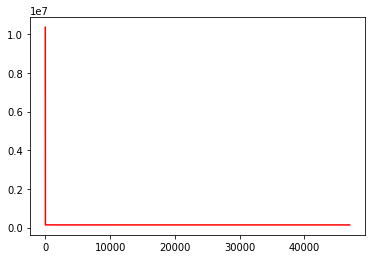

In [36]:
imin = np.argmin(errors)
print("-----")
print(f"epoch du min : {imin}")
print(f"error du min : {errors[imin]}")
print(f"thetas du min :")
print(thetas[imin])

plt.plot(errors,color="red")